In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('heart.csv')

## Data Analysis and Visualizations

In [7]:
df.head().style.set_properties(**{'background-color': 'bisque',
                           'color': 'black'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


In [8]:
df.isnull().sum().to_frame()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [9]:
people_dict = df["HeartDisease"].value_counts(normalize=True).to_dict()
people_dict["Heart Disease"] = people_dict.pop(1)
people_dict["Normal"] = people_dict.pop(0)
df = df[df["RestingBP"] != 0]

## Target Value Distribution


Text(0.5, 1.0, 'Distribution of Target Value')

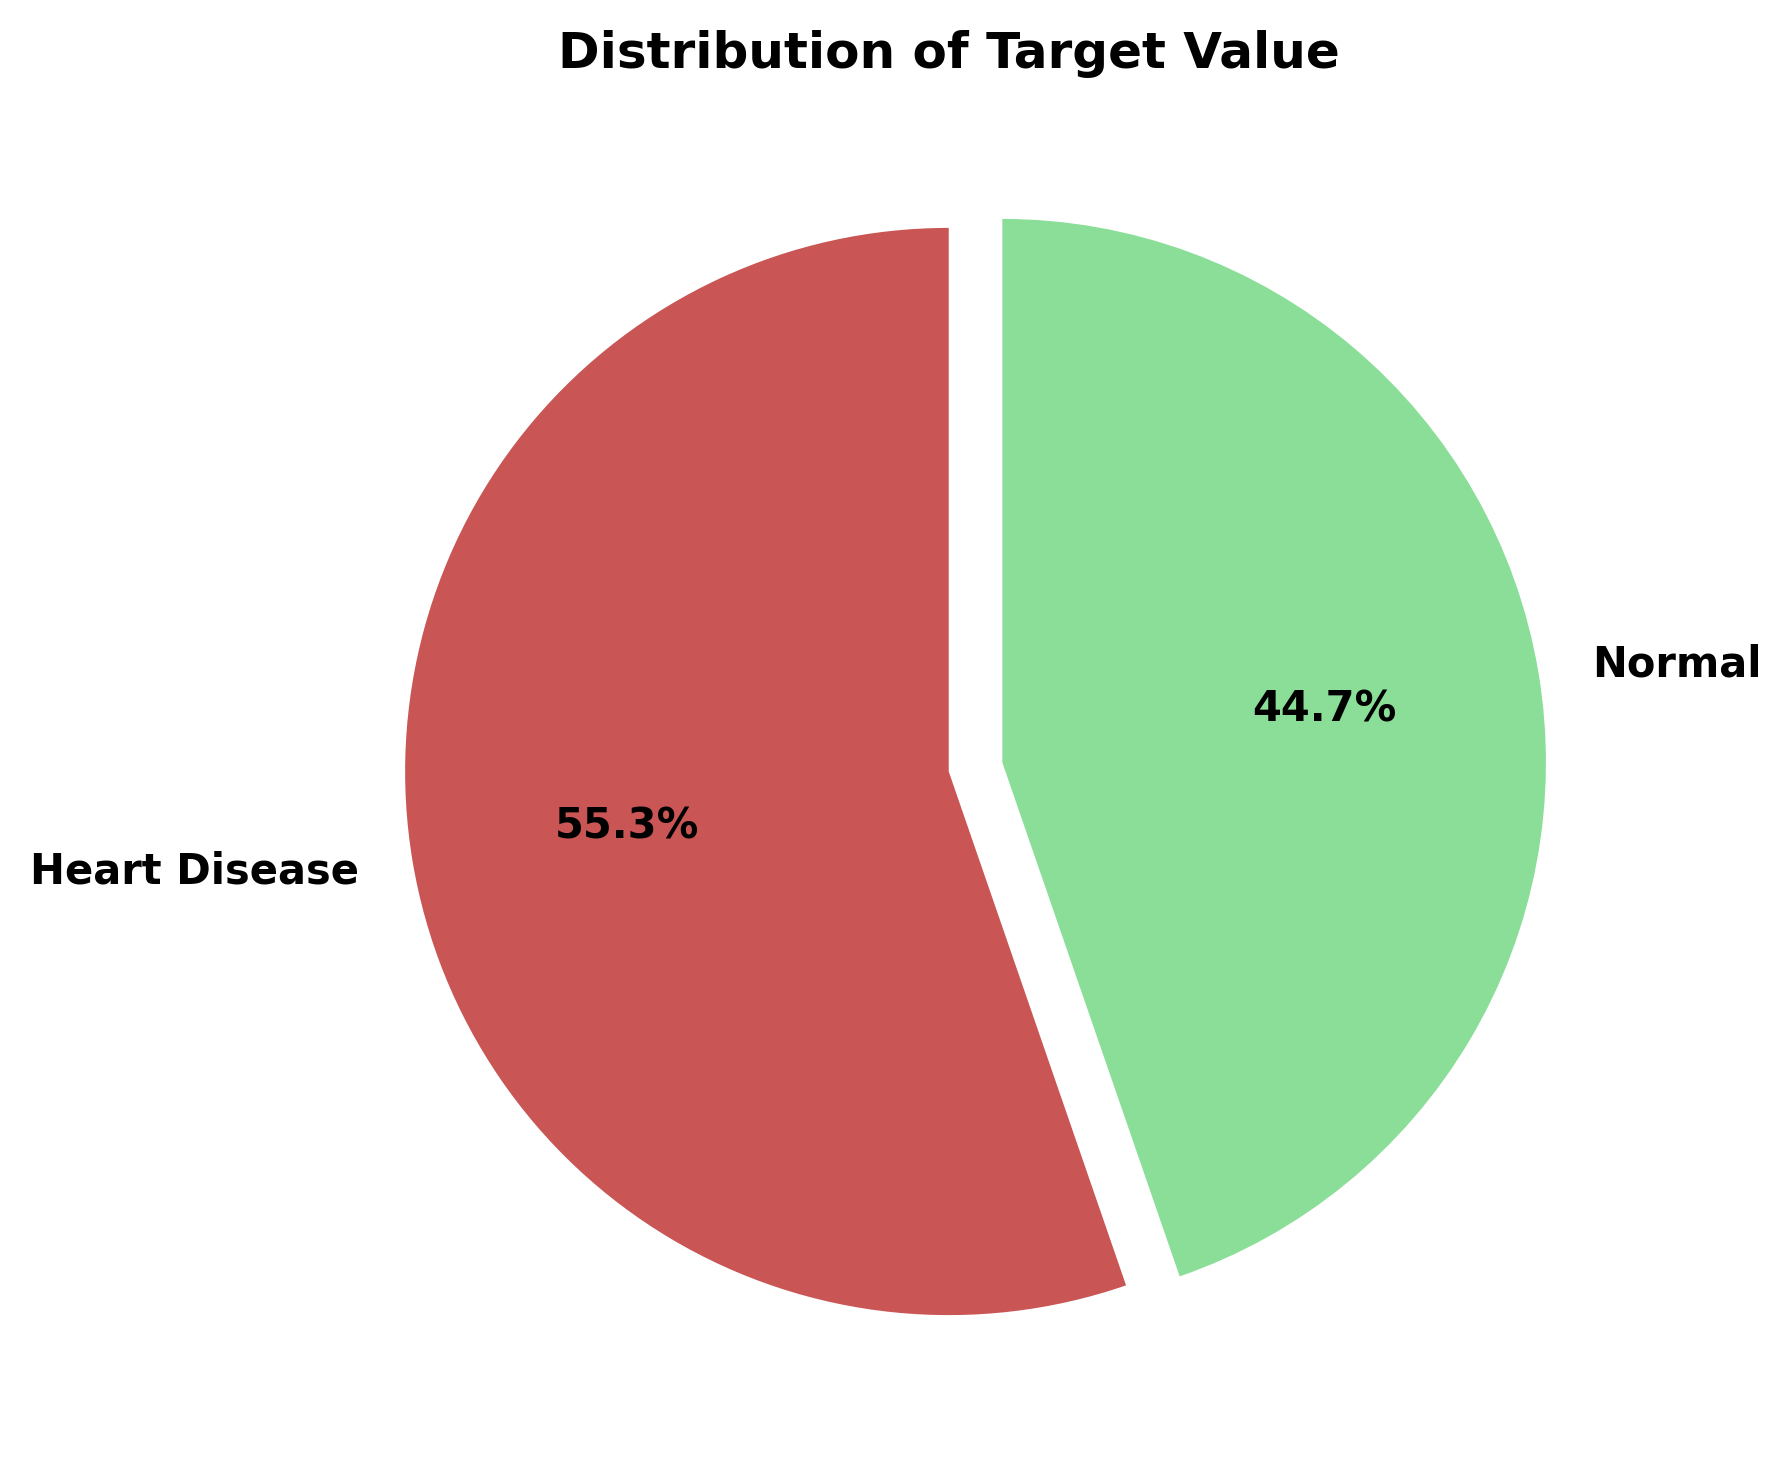

In [10]:
plt.figure(figsize=(8,6),dpi=300)
labels = people_dict.keys()
sizes = people_dict.values()
colors = ["#C95555", "#8ADE98"]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False,colors=colors, startangle=90, textprops={'fontsize': 10, "fontweight" : "bold"})
plt.title("Distribution of Target Value", size=12, fontweight="bold")

In [11]:
df_heart_dis = df[df["HeartDisease"] == 1]
df_normal = df[df["HeartDisease"] == 0]

chest_type_dict_heart_dis = df_heart_dis["ChestPainType"].value_counts(normalize=True).sort_values().to_dict()
chest_type_dict_normal = df_normal["ChestPainType"].value_counts(normalize=True).sort_values().to_dict()

## Heart Disease People\ Chest Pain Type and People Distribution

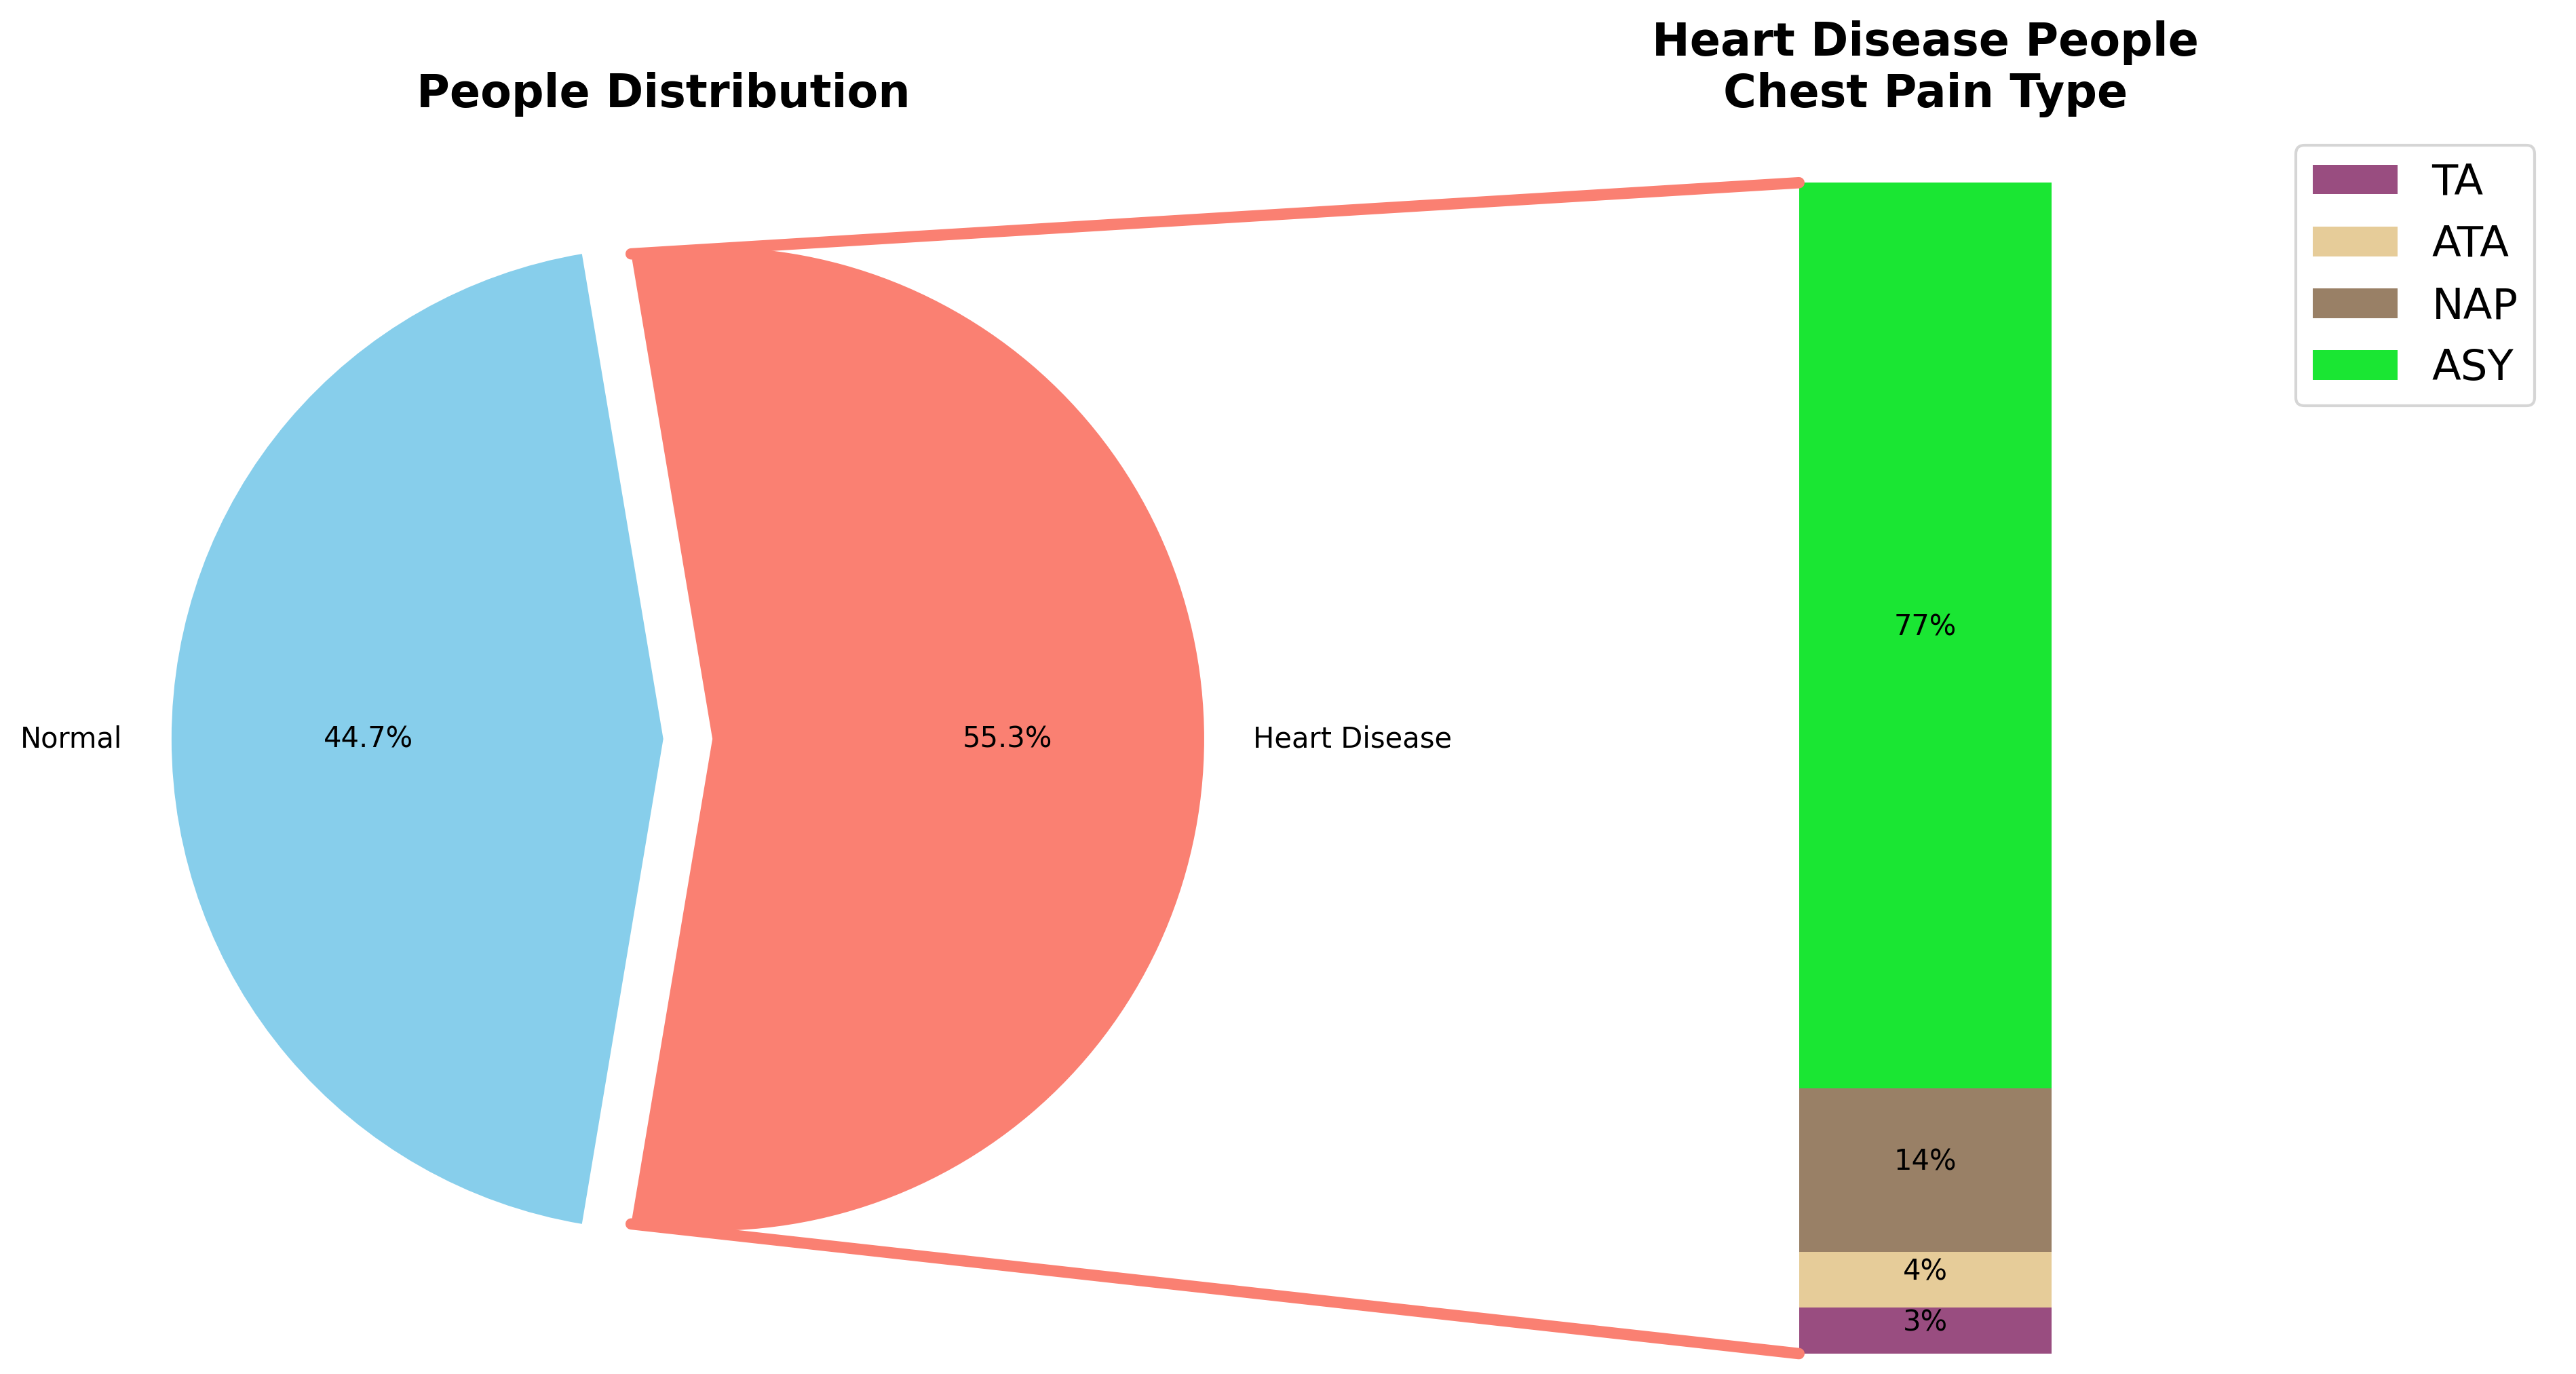

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=300)
fig.subplots_adjust(wspace=0)

ratios = list(people_dict.values())
labels = list(people_dict.keys())
explode = [0.1, 0]

angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode, colors =("salmon", "skyblue"))

ax1.set_title("People Distribution", fontweight="bold", size=16)

xpos = 0
bottom = 0
ratios = list(chest_type_dict_heart_dis.values())
width = .2
colors = [[.6, .3, .5], [.9, .8, .6], [.6, .5, .4], [.1, .9, .2]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Heart Disease People\nChest Pain Type', fontweight="bold", size=16)
ax2.legend(list(chest_type_dict_heart_dis.keys()), prop={'size':15})
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color("salmon")
con.set_linewidth(4)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color("salmon")
ax2.add_artist(con)
con.set_linewidth(4)

## Normal People\ Chest Pain Type and People Distribution

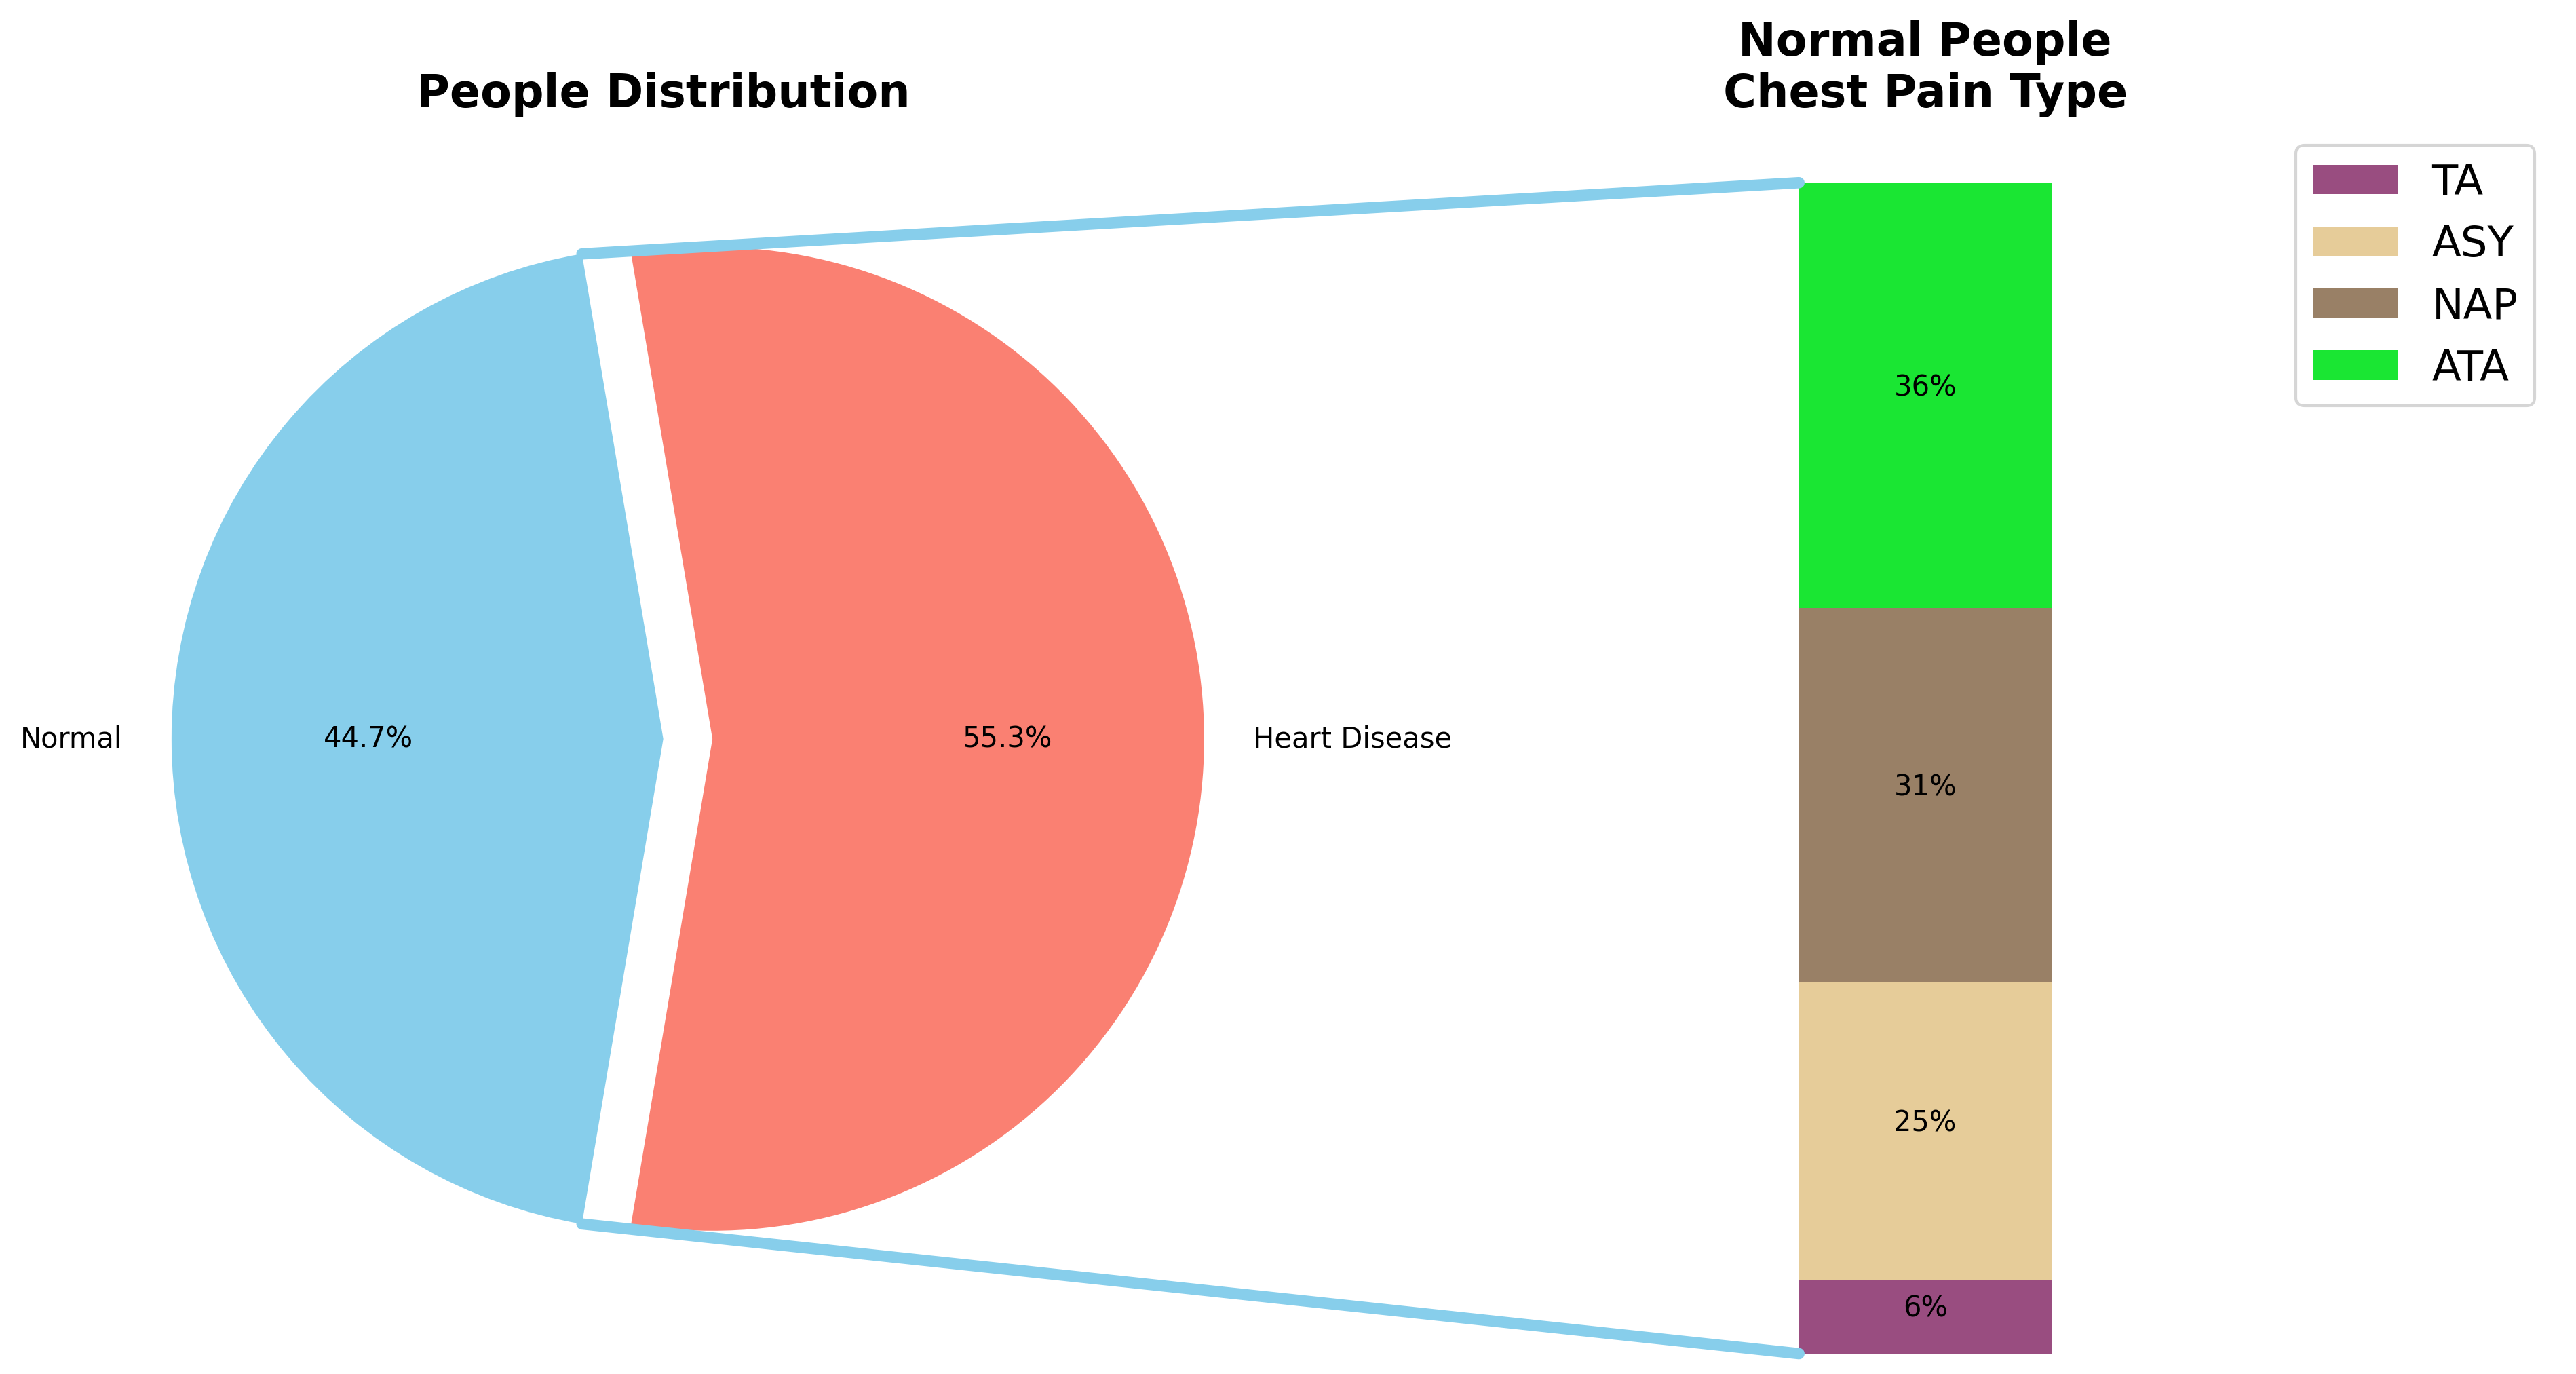

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=300)
fig.subplots_adjust(wspace=0)

ratios = list(people_dict.values())
labels = list(people_dict.keys())
explode = [0.1, 0]

angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode, colors =("salmon", "skyblue"))

ax1.set_title("People Distribution", fontweight="bold", size=16)

xpos = 0
bottom = 0
ratios = list(chest_type_dict_normal.values())
width = .2
colors = [[.6, .3, .5], [.9, .8, .6], [.6, .5, .4], [.1, .9, .2]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Normal People\nChest Pain Type', fontweight="bold", size=16)
ax2.legend(list(chest_type_dict_normal.keys()), prop={'size':15})
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[1].center, ax1.patches[1].r
bar_height = sum([item.get_height() for item in ax2.patches])

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color("skyblue")
con.set_linewidth(4)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color("skyblue")
ax2.add_artist(con)
con.set_linewidth(4)

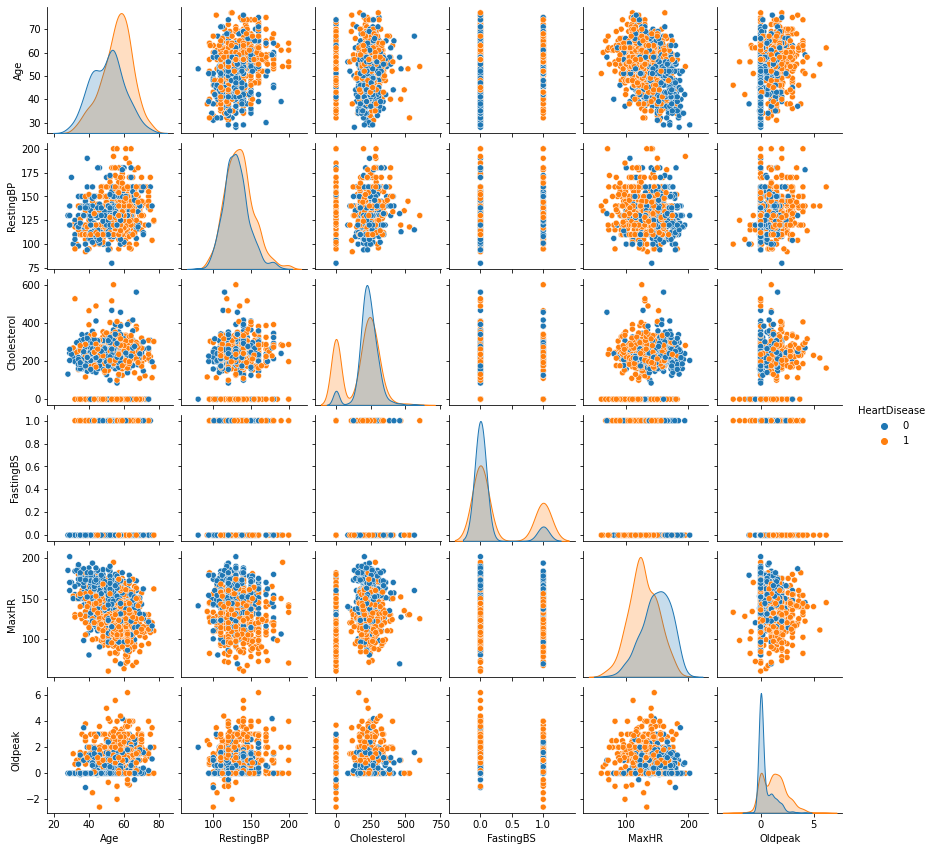

In [14]:
sns.pairplot(df, hue='HeartDisease', height=2)

## Age Distribution of People with Heart Disease and Age Distribution of Normal People

C:\Users\semak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\semak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution of Normal People')

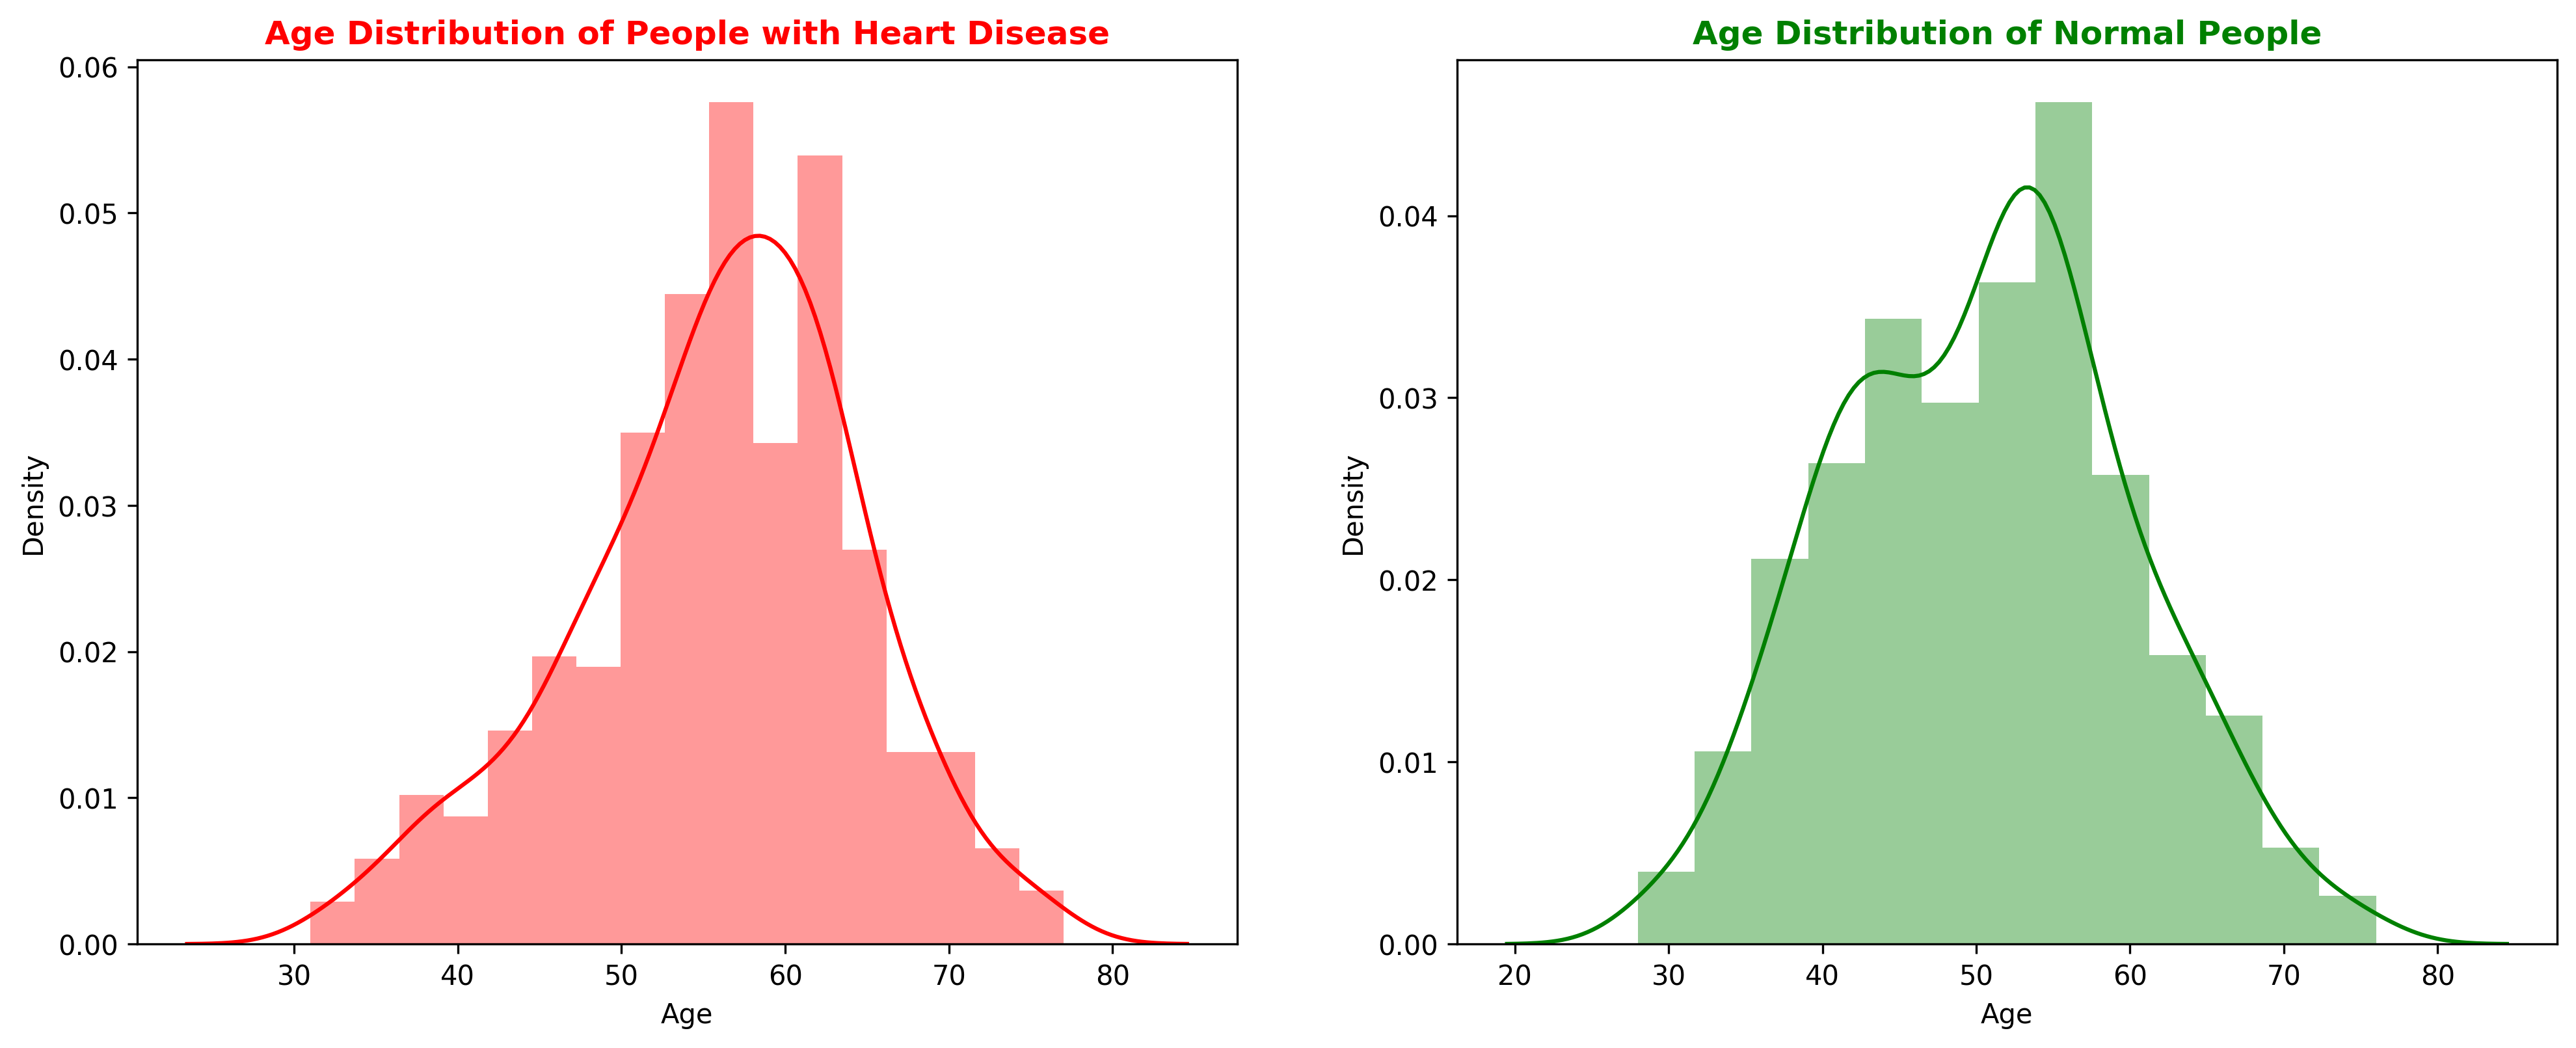

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), dpi=300)
sns.distplot(df_heart_dis["Age"], ax=ax1, color="red")
sns.distplot(df_normal["Age"], ax=ax2, color="green")
ax1.set_title("Age Distribution of People with Heart Disease", fontweight="bold", color="red")
ax2.set_title("Age Distribution of Normal People", fontweight="bold", color="green")

## RestingBP Distribution of People with Heart Disease and RestingBP Distribution of Normal People

C:\Users\semak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\semak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'RestingBP Distribution of Normal People')

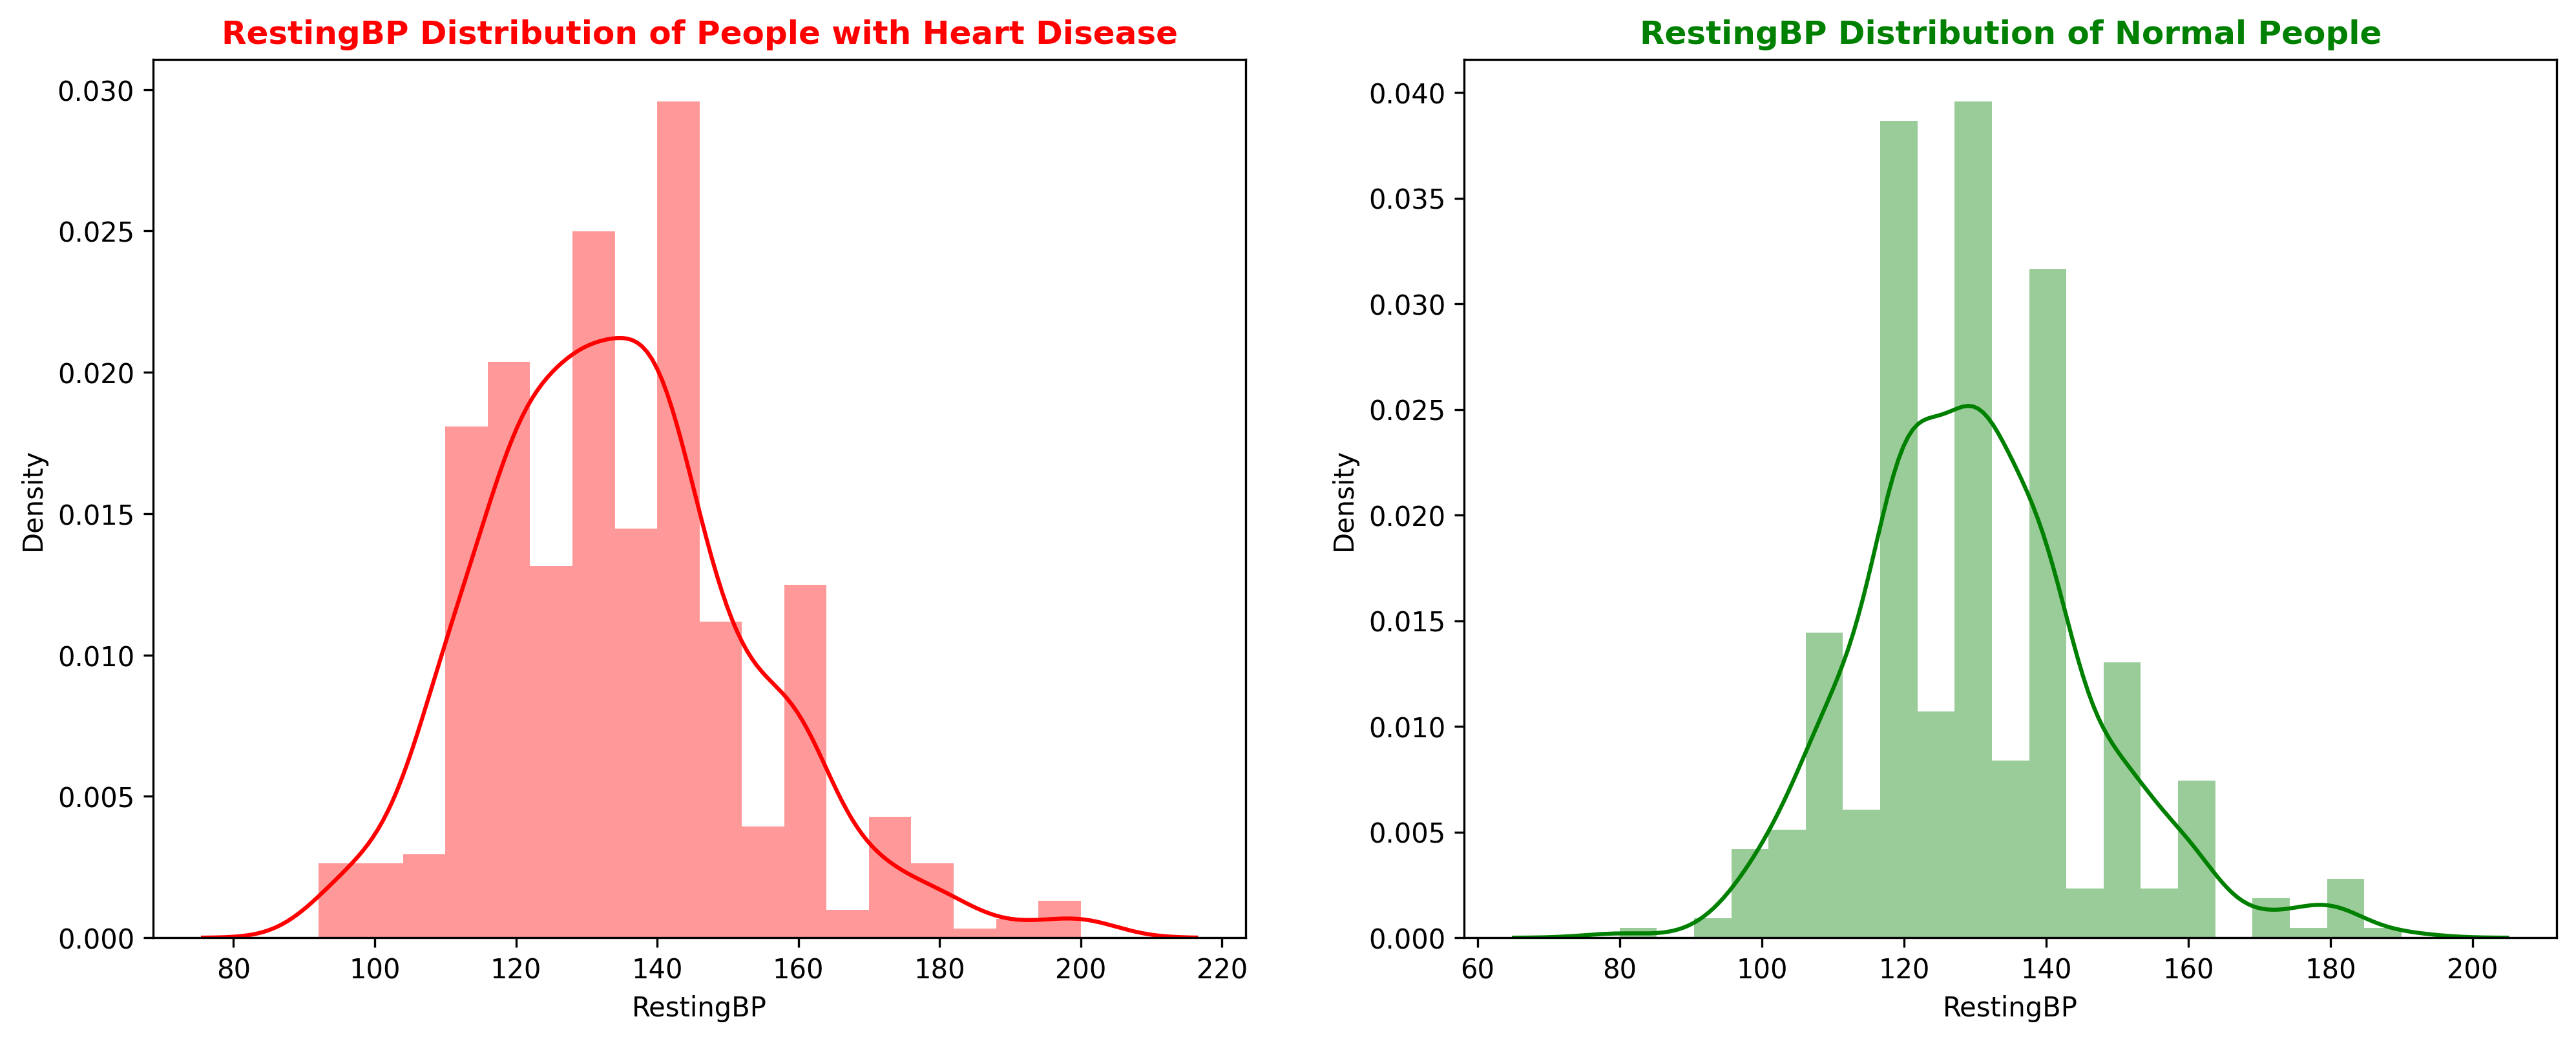

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), dpi=300)
sns.distplot(df_heart_dis["RestingBP"], ax=ax1, color="red")
sns.distplot(df_normal["RestingBP"], ax=ax2, color="green")
ax1.set_title("RestingBP Distribution of People with Heart Disease", fontweight="bold", color="red")
ax2.set_title("RestingBP Distribution of Normal People", fontweight="bold", color="green")

## MaxHR Distribution of People with Heart Disease and MaxHR Distribution of Normal People

C:\Users\semak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\semak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'MaxHR Distribution of Normal People')

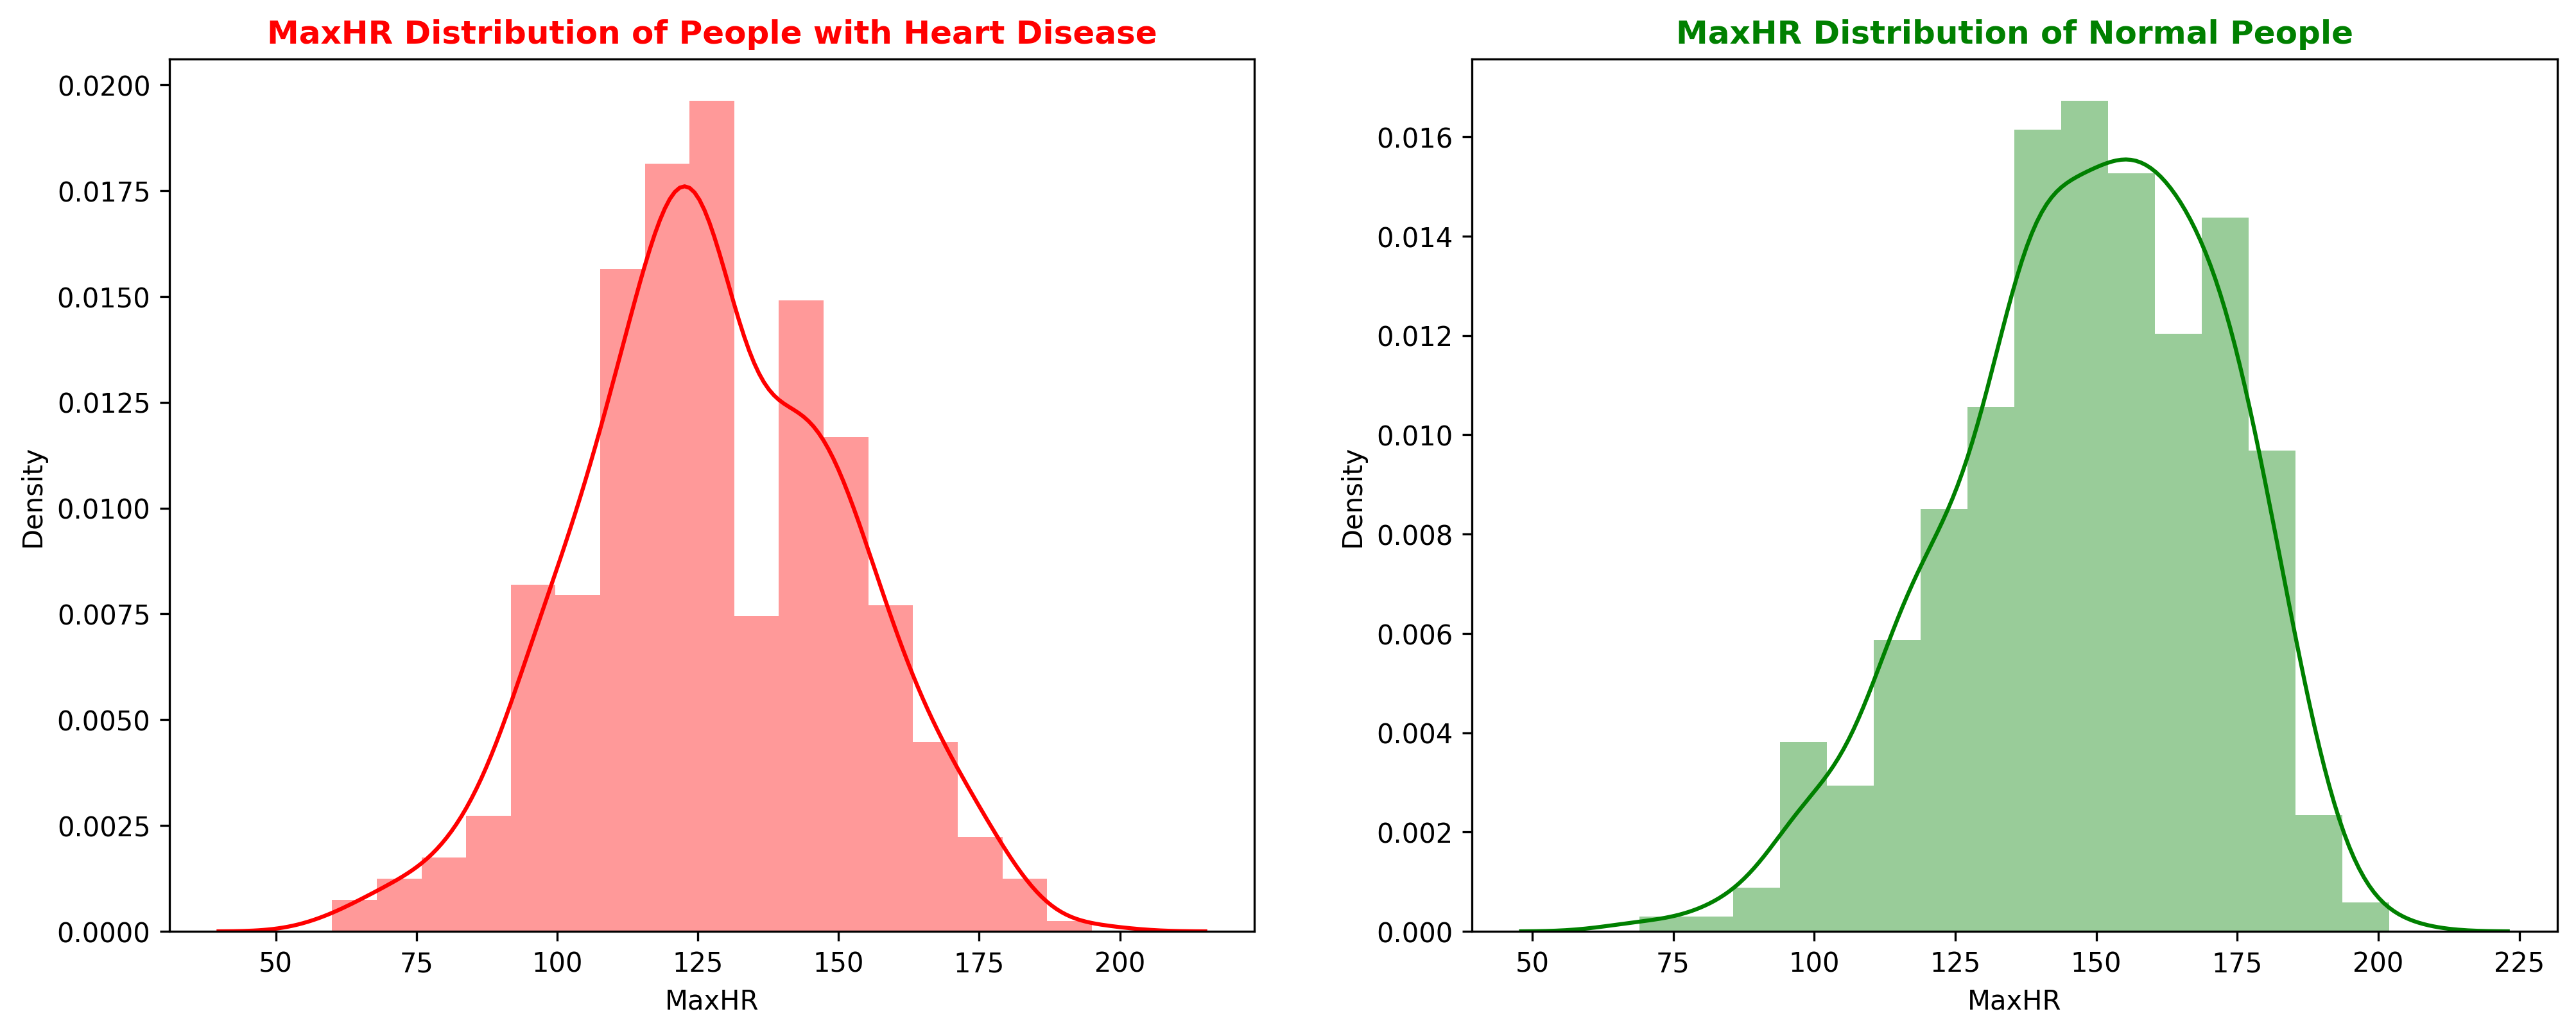

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), dpi=300)
sns.distplot(df_heart_dis["MaxHR"], ax=ax1, color="red")
sns.distplot(df_normal["MaxHR"], ax=ax2, color="green")
ax1.set_title("MaxHR Distribution of People with Heart Disease", fontweight="bold", color="red")
ax2.set_title("MaxHR Distribution of Normal People", fontweight="bold", color="green")

## The Slope of the Peak Exercise ST Segment for People with Heart Disease and The Slope of the Peak Exercise ST Segment for Normal People 

Text(0.5, 1.0, 'The Slope of the Peak Exercise \nST Segment for Normal People')

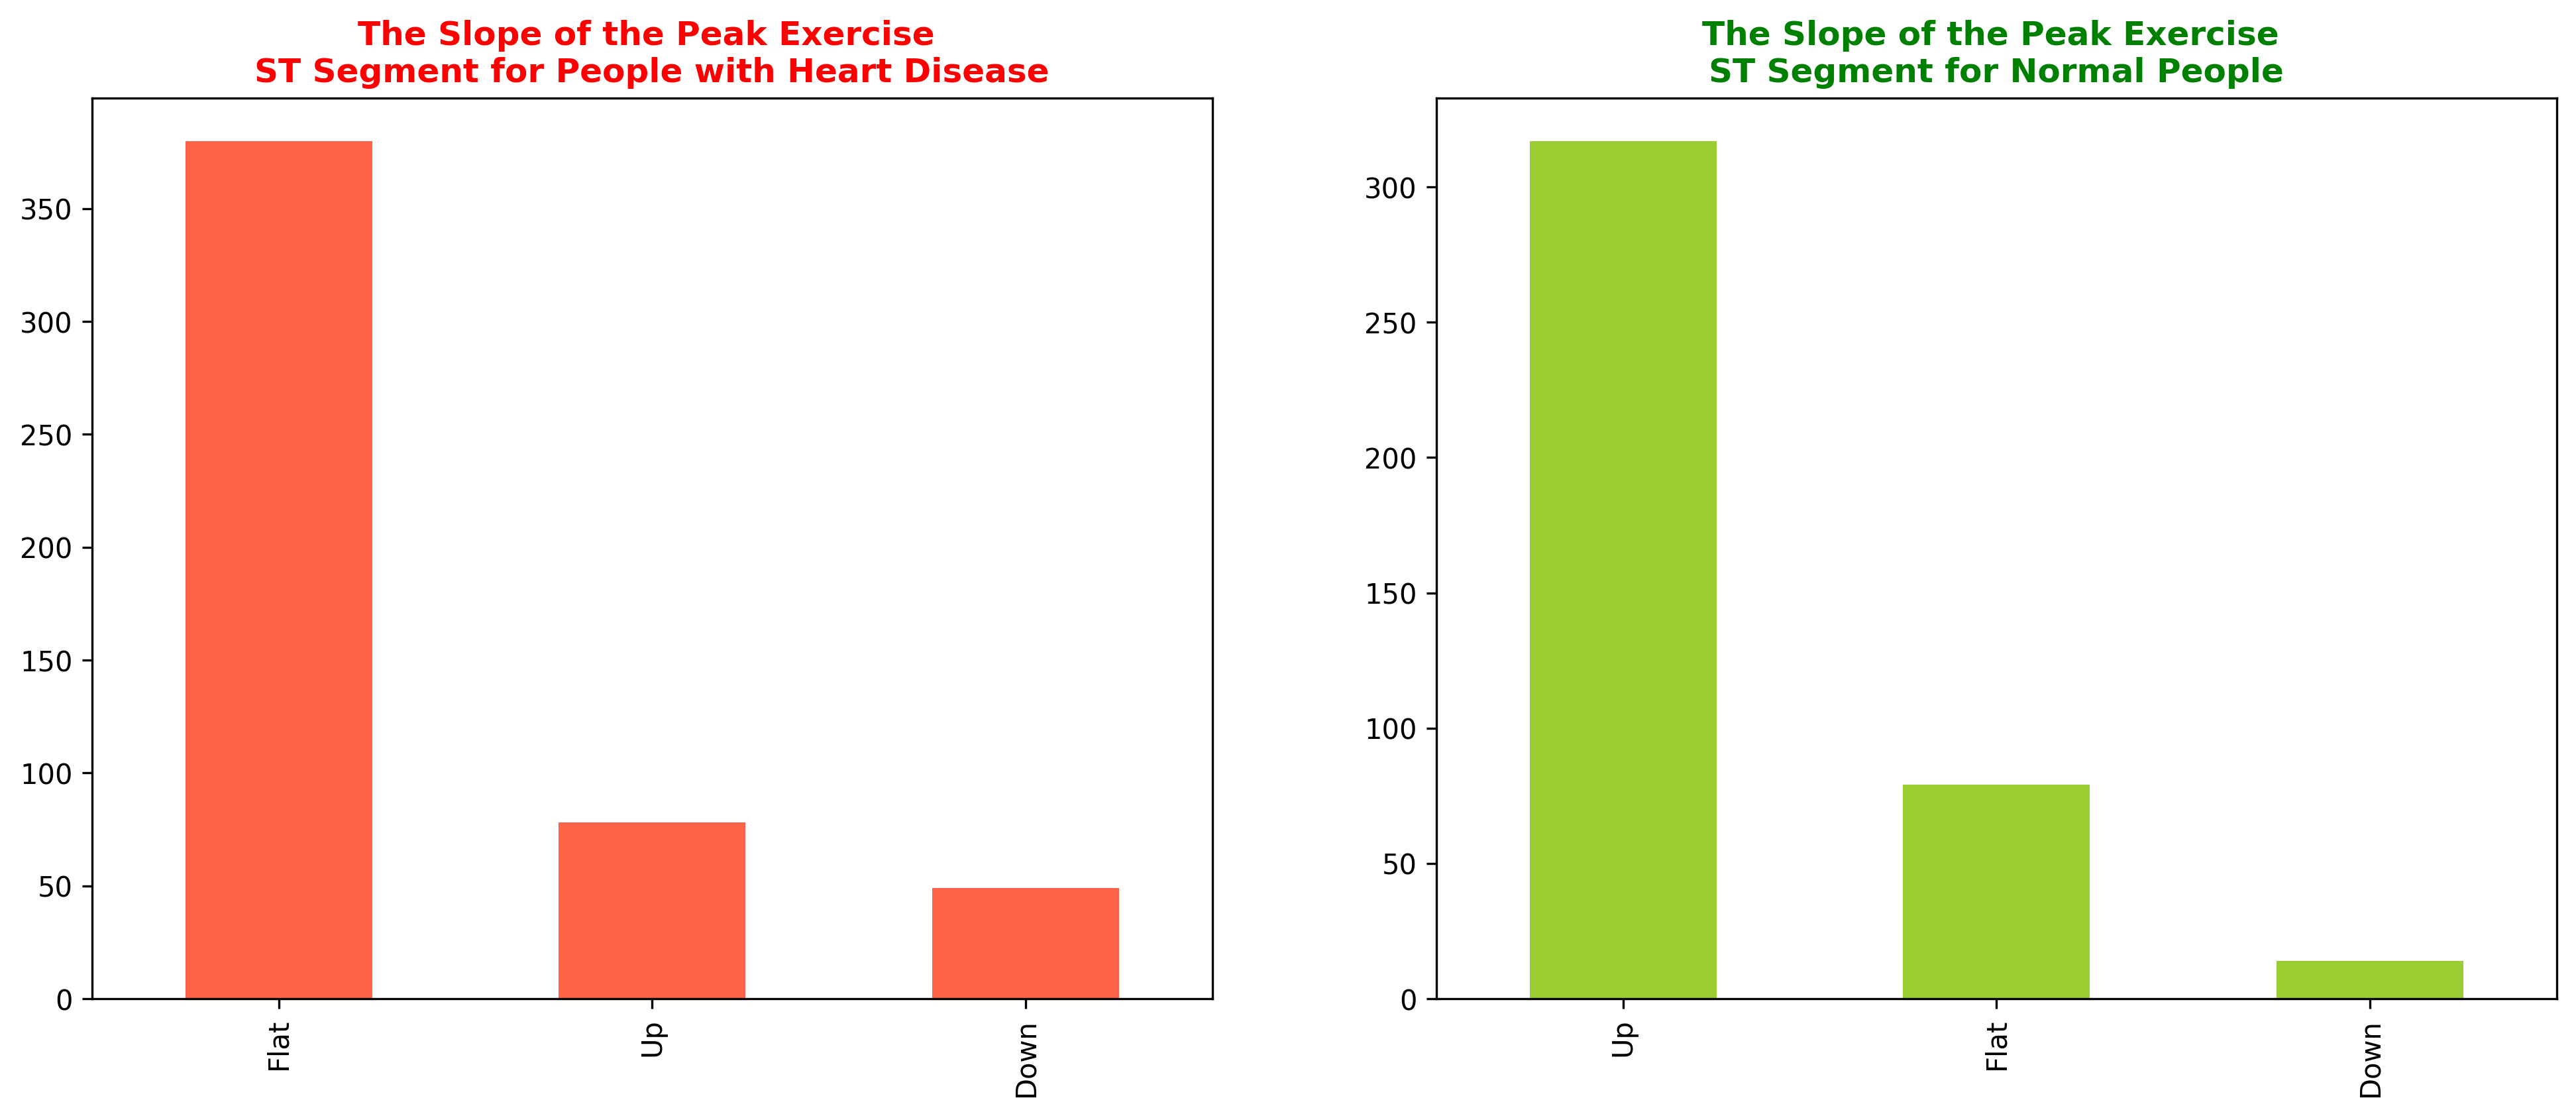

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), dpi=300)
df_heart_dis["ST_Slope"].value_counts().plot(kind="bar", ax=ax1, color="tomato")
df_normal["ST_Slope"].value_counts().plot(kind="bar", ax=ax2, color="yellowgreen")
ax1.set_title("The Slope of the Peak Exercise \nST Segment for People with Heart Disease", fontweight="bold", color="red")
ax2.set_title("The Slope of the Peak Exercise \nST Segment for Normal People", fontweight="bold", color="green")

## RestingECG for People with Heart Disease and RestingECG for Normal People

Text(0.5, 1.0, 'RestingECG for Normal People')

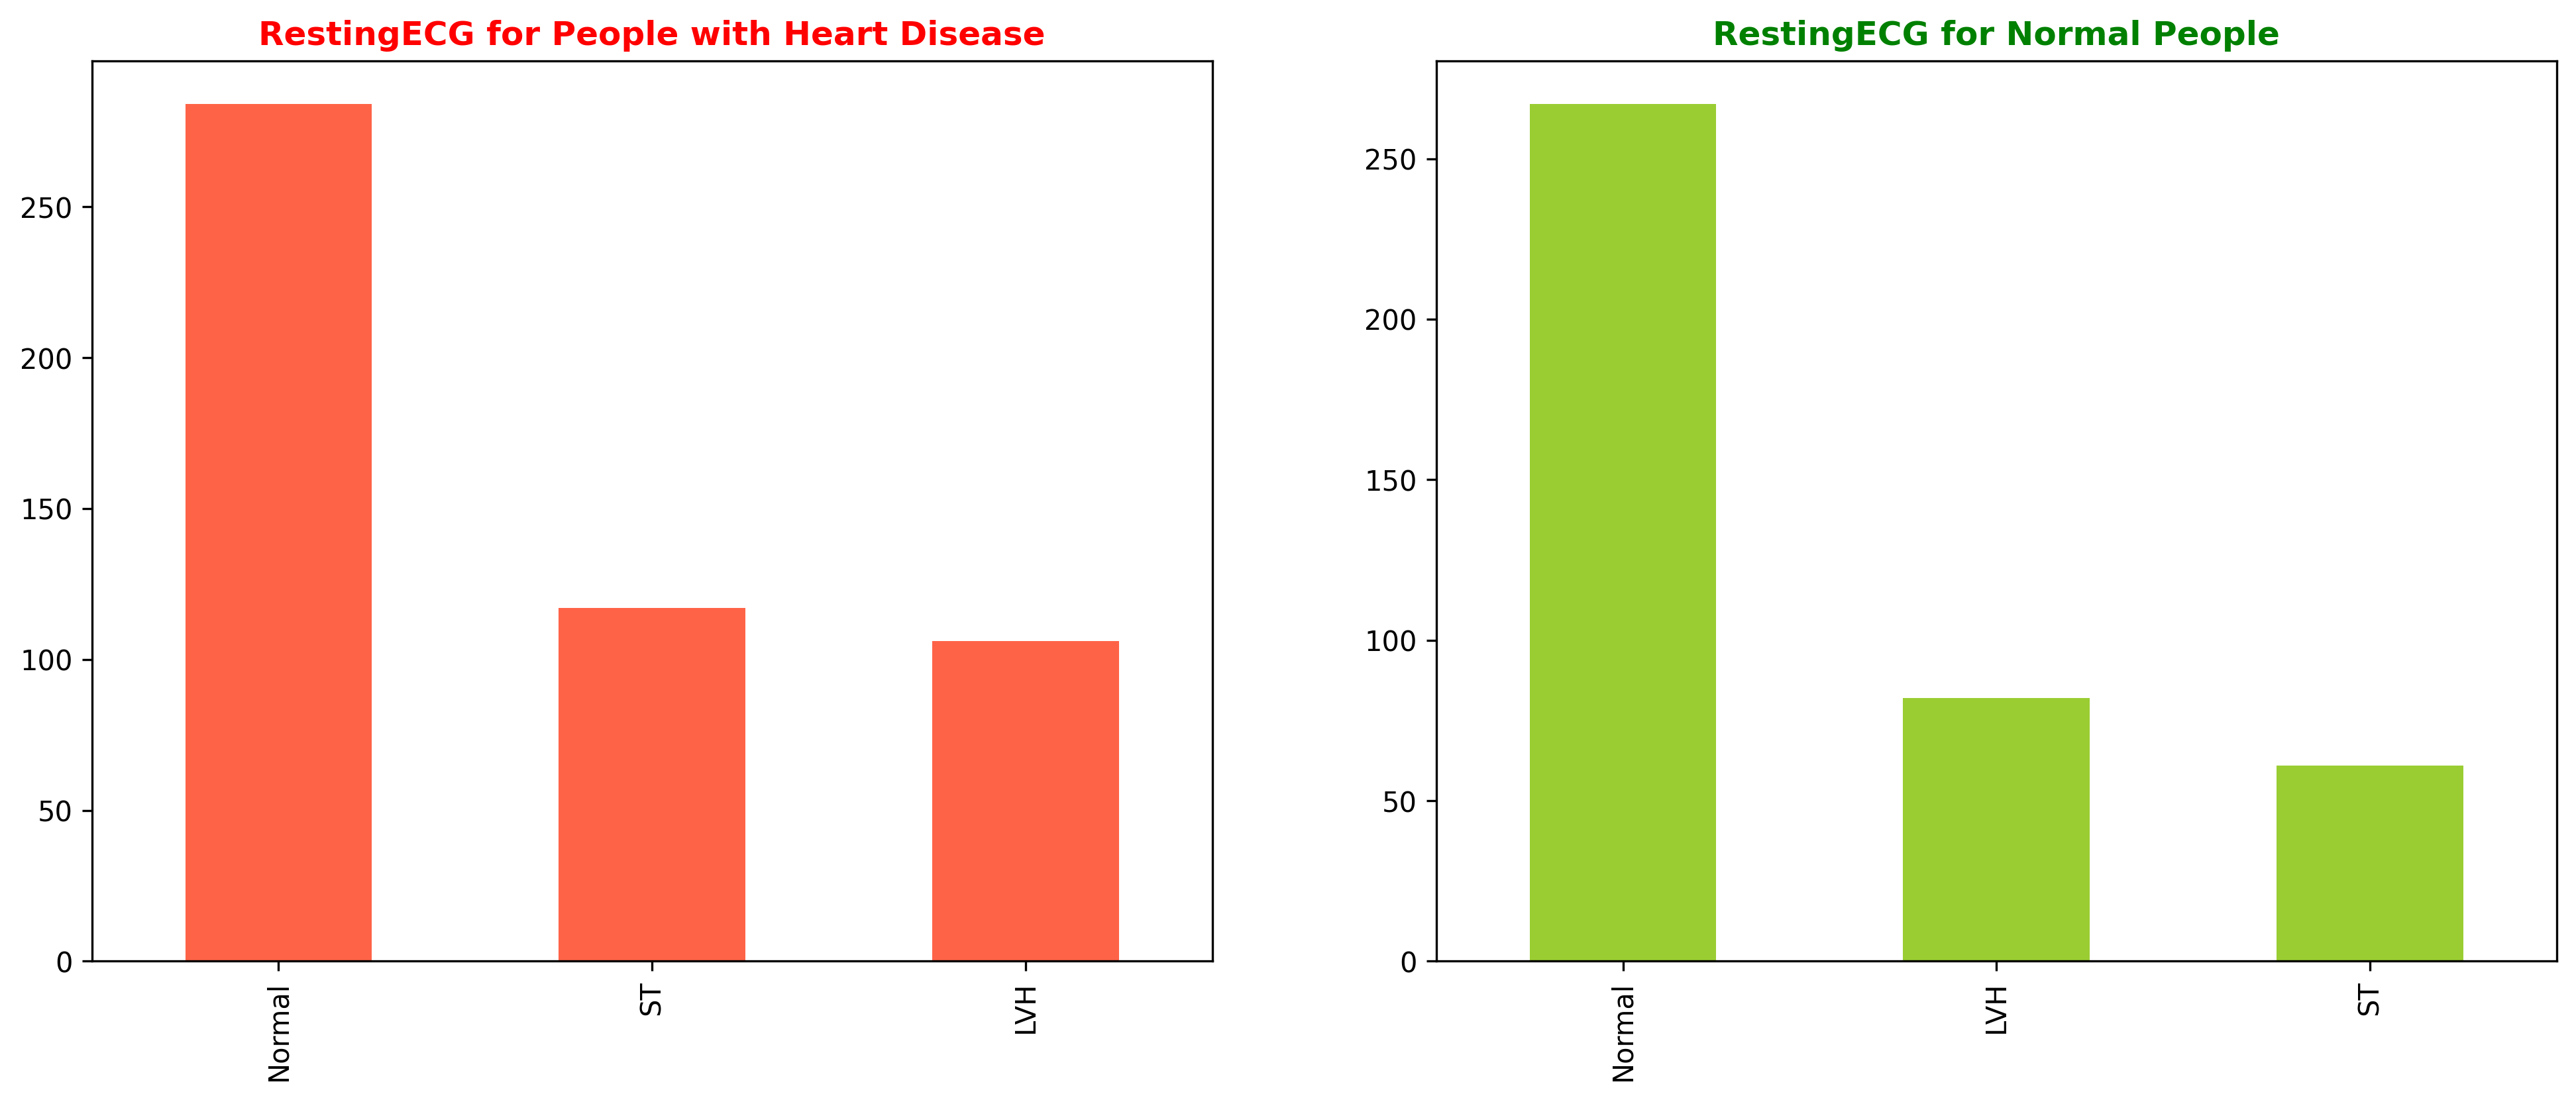

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), dpi=300)
df_heart_dis["RestingECG"].value_counts().plot(kind="bar", ax=ax1, color="tomato")
df_normal["RestingECG"].value_counts().plot(kind="bar", ax=ax2, color="yellowgreen")
ax1.set_title("RestingECG for People with Heart Disease", fontweight="bold", color="red")
ax2.set_title("RestingECG for Normal People", fontweight="bold", color="green")

## Chest Pain Type and sex

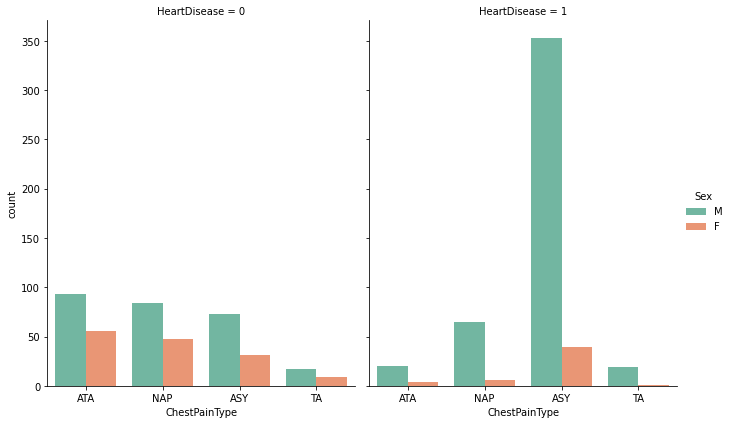

In [20]:
sns.catplot(x="ChestPainType", hue="Sex", col="HeartDisease",
                data=df, kind="count",
                height=6, aspect=.8, palette="Set2")

## RestingECG and sex

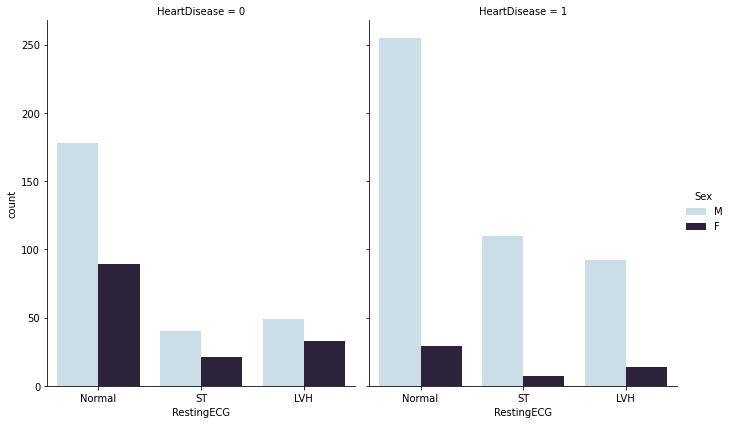

In [21]:
sns.catplot(x="RestingECG", hue="Sex", col="HeartDisease",
                data=df, kind="count",
                height=6, aspect=.8, palette="ch:s=.25,rot=-.25")

## Exercise Angina and sex

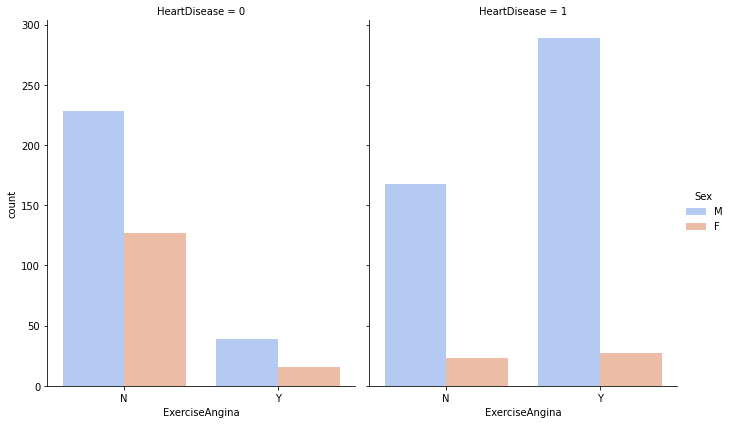

In [22]:
sns.catplot(x="ExerciseAngina", hue="Sex", col="HeartDisease",
                data=df, kind="count",
                height=6, aspect=.8, palette="coolwarm")

## Encoding Categorical Columns

In [23]:
lb = LabelEncoder()
for i in df.columns:
    if((df[i].dtypes == "object") and (df[i].nunique() < 3)):
        df[i] = lb.fit_transform(df[i])
    elif((df[i].dtypes == "object") and (df[i].nunique() > 2)):
        df = pd.get_dummies(df, columns=[i], drop_first=True) 

## Correlation Matrix

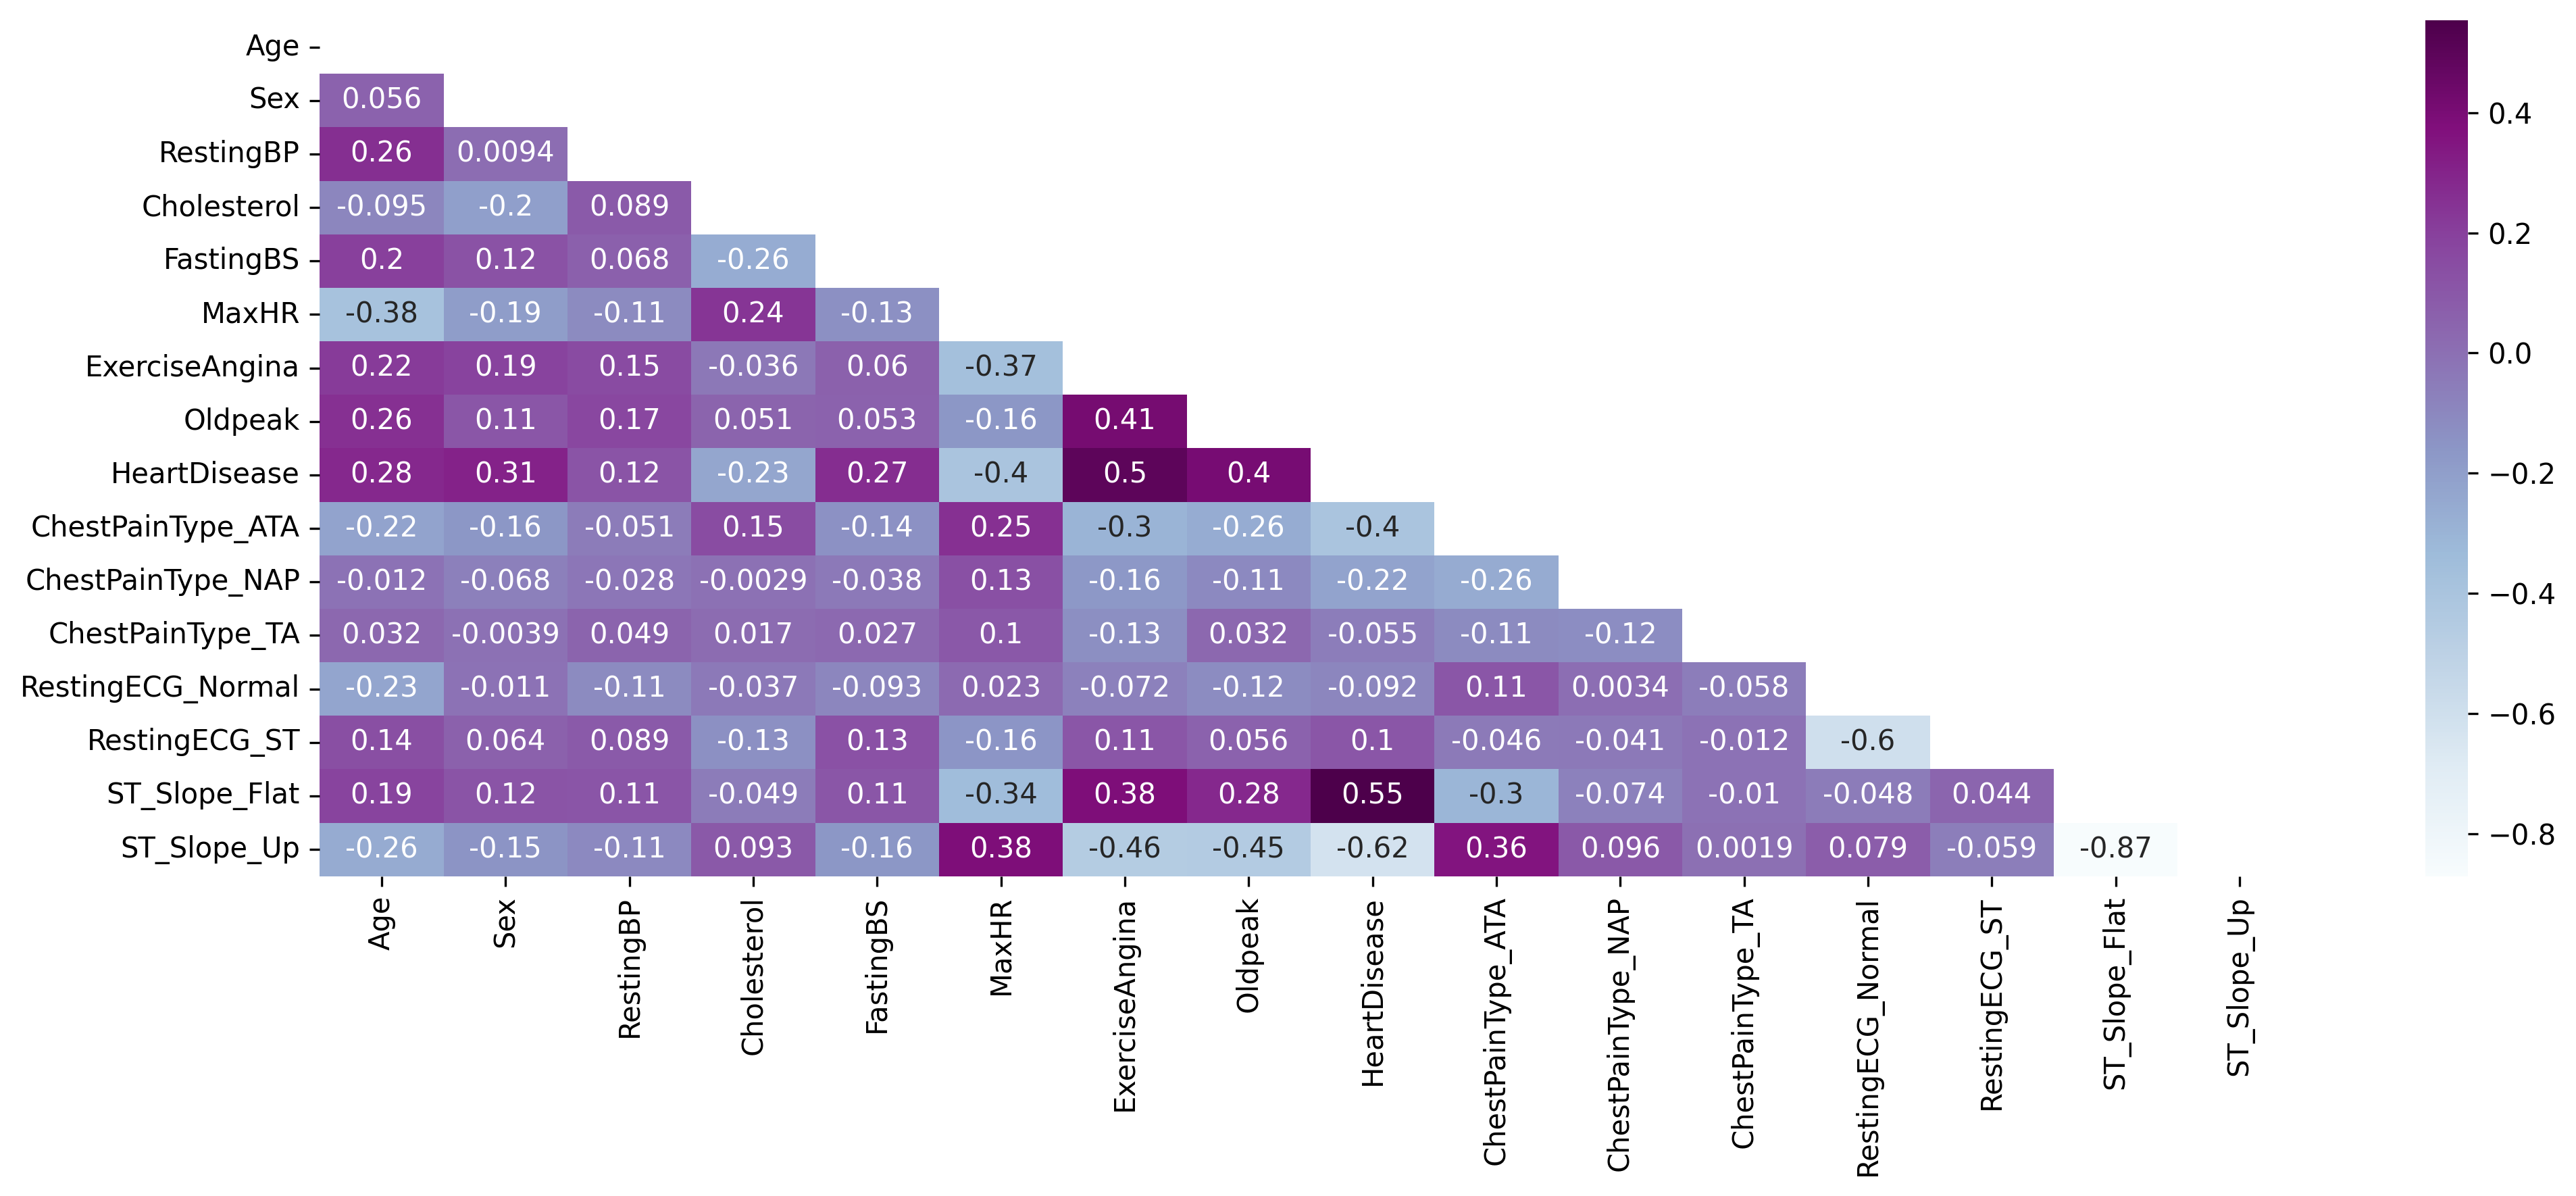

In [24]:
plt.figure(figsize=(14,6), dpi=300)
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, annot=True, cmap="BuPu")
plt.tight_layout()

## Feature Scaling

In [25]:
X = df.drop("HeartDisease", axis = 1)
y = df["HeartDisease"]
ss = StandardScaler()
df_scaled = ss.fit_transform(X)

## Splitting Data as Train Data and Test Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size = 0.33, random_state=42)

## Principal Component Analysis

Text(0, 0.5, 'Cumulative Explained Variance')

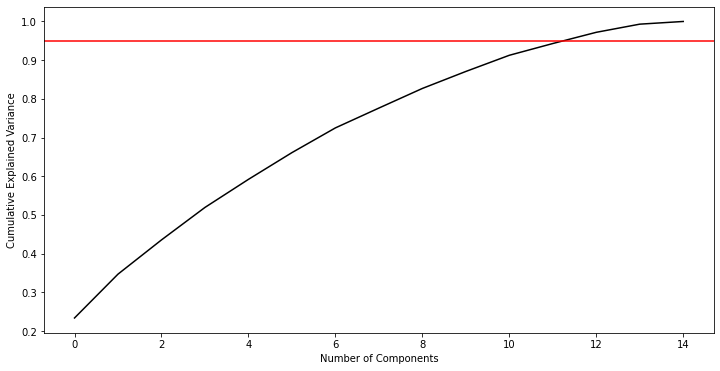

In [28]:
pca = PCA().fit(X_train)
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="black")
plt.axhline(0.95, color="red")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [29]:
pca = PCA(n_components=11)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

(614, 11)

# Models
## Best Number of Neighbors for KNN


Text(0, 0.8910891089108911, '0.8911')

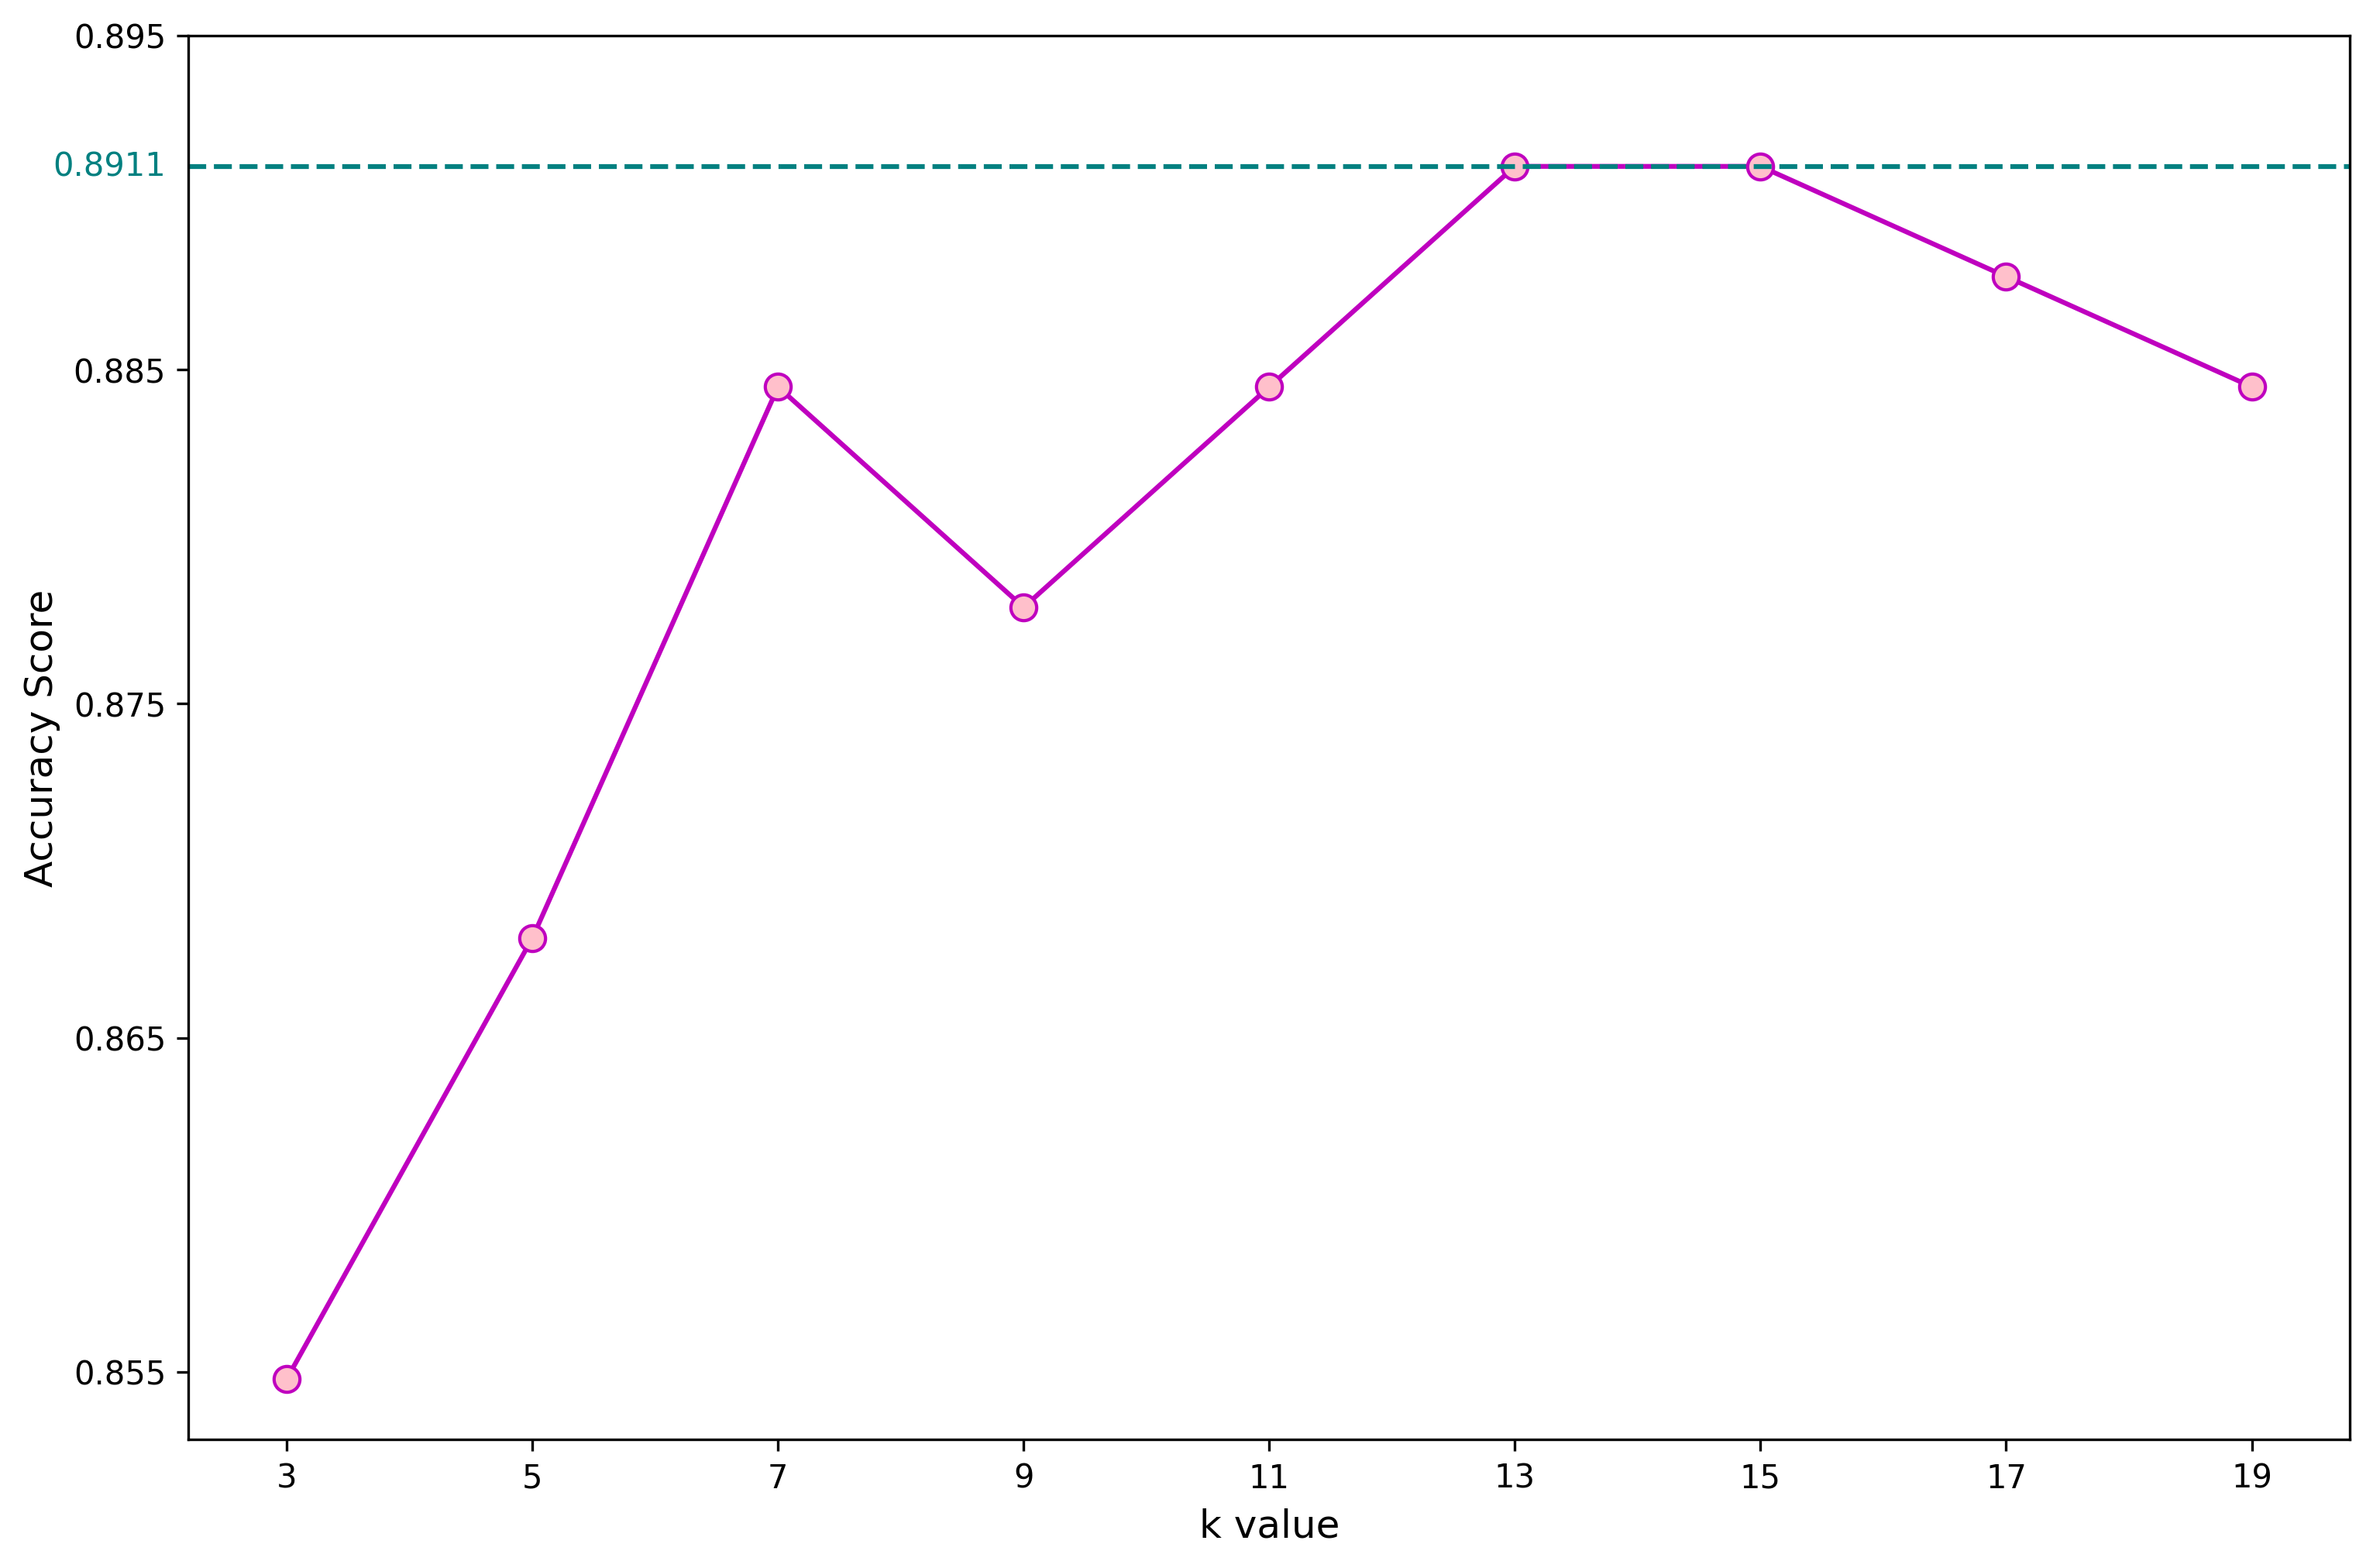

In [30]:
neighbors_list = list(range(3,20,2))
knn_score_list = []

for number in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=number)
    knn.fit(X_train, y_train)
    y_predict_knn = knn.predict(X_test)
    knn_score_list.append(accuracy_score(y_test, y_predict_knn))
    
fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=300)
plt.plot(neighbors_list, knn_score_list, marker="o", markerfacecolor="pink", markersize=8, color="m")
plt.xticks(np.arange(3, 20, 2))
plt.yticks(np.arange(0.855, 0.900, 0.010))
plt.xlabel("k value", size=12)
plt.ylabel("Accuracy Score", size=12)
ax.axhline(y = max(knn_score_list) , linewidth = 1.5, color = "teal", linestyle="dashed")
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, max(knn_score_list), "{:.4f}".format(max(knn_score_list)), color="teal", transform=trans, 
        ha="right", va="center")

In [31]:
class models:

    def __init__(self, X_train, X_test, y_train, y_test):

        self.score_dict = {}

        self.X_train = X_train 
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        #Logistic Regression
        self.lr = LogisticRegression(C = 1)
        self.lr.fit(self.X_train, self.y_train)
        self.y_predict_lr = self.lr.predict(self.X_test)
        #DTC
        self.dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 12, min_samples_split = 10, random_state=42)
        self.dtc.fit(self.X_train, self.y_train)
        self.y_predict_dtc = self.dtc.predict(self.X_test)
        #RFC
        self.rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=10)
        self.rfc.fit(self.X_train, self.y_train)
        self.y_predict_rfc = self.rfc.predict(self.X_test)
        #SVM
        self.svm = SVC(probability=True, C = 100, gamma = 0.01, kernel = 'rbf')
        self.svm.fit(self.X_train, self.y_train)
        self.y_predict_svm = self.svm.predict(self.X_test)
        #KNN
        self.knn = KNeighborsClassifier(n_neighbors = 13)
        self.knn.fit(self.X_train, self.y_train)
        self.y_predict_knn = knn.predict(self.X_test)
        #Naive Bayes
        self.nb = GaussianNB()
        self.nb.fit(self.X_train, self.y_train)
        self.y_predict_nb = self.nb.predict(self.X_test)

    def accuracy_scores(self):

        self.score_dict["LR"] = round(self.lr.score(self.X_test, self.y_test), 3)
        self.score_dict["DTC"] = round(self.dtc.score(self.X_test, self.y_test), 3)
        self.score_dict["RFC"] = round(self.rfc.score(self.X_test, self.y_test), 3)
        self.score_dict["SVM"] = round(self.svm.score(self.X_test, self.y_test), 3)
        self.score_dict["KNN"] = round(self.knn.score(self.X_test, self.y_test), 3)
        self.score_dict["NB"] = round(self.nb.score(self.X_test, self.y_test), 3)

        fig, ax = plt.subplots(2,1, figsize=(12,10),dpi=300)
        acc_scores = [list(self.score_dict.values())]
        collabel = tuple(self.score_dict.keys())
        index_max = list(self.score_dict.values()).index(max(list(self.score_dict.values())))
        ax[0].axis('tight')
        ax[0].axis('off')
        the_table = ax[0].table(cellText=acc_scores, colLabels=collabel, loc='center', cellLoc="center")

        for i in range(0, len(list(self.score_dict.keys()))):
            the_table[(0, i)].set_facecolor("#EBCE5A")
        
        the_table[(1, index_max)].set_facecolor("#98DE6F")
        ax[1].plot(list(self.score_dict.keys()), list(self.score_dict.values()), color = "green", marker="o")
        plt.title("Comparison of Models According to Acc. Scores", color="salmon", fontweight="bold")
        plt.xlabel("Model", color="salmon")
        plt.ylabel("Acc. Score", color="salmon")
        plt.show()


    def con_matrix(self):
        
        cm_lr = confusion_matrix(self.y_test, self.y_predict_lr)
        cm_lr_df = pd.DataFrame(cm_lr)
        plt.figure(figsize=(10,6), dpi=300)
        sns.heatmap(cm_lr_df, annot=True, cmap="Purples", fmt=".1f")
        plt.title("LR Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        cm_dtc = confusion_matrix(self.y_test, self.y_predict_dtc)
        cm_dtc_df = pd.DataFrame(cm_dtc)
        plt.figure(figsize=(10,6), dpi=300)
        sns.heatmap(cm_dtc_df, annot=True, cmap="Purples", fmt=".1f")
        plt.title("DTC Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        cm_rfc = confusion_matrix(self.y_test, self.y_predict_rfc)
        cm_rfc_df = pd.DataFrame(cm_rfc)
        plt.figure(figsize=(10,6), dpi=300)
        sns.heatmap(cm_rfc_df, annot=True, cmap="Purples",fmt=".1f")
        plt.title("RFC Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        cm_svm = confusion_matrix(self.y_test, self.y_predict_svm)
        cm_svm_df = pd.DataFrame(cm_svm)
        plt.figure(figsize=(10,6), dpi=300)
        sns.heatmap(cm_svm_df, annot=True, cmap="Purples",fmt=".1f")
        plt.title("SVM Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        cm_knn = confusion_matrix(self.y_test, self.y_predict_knn)
        cm_knn_df = pd.DataFrame(cm_knn)
        plt.figure(figsize=(10,6), dpi=300)
        sns.heatmap(cm_knn_df, annot=True, cmap="Purples", fmt=".1f")
        plt.title("KNN Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        cm_nb = confusion_matrix(self.y_test, self.y_predict_nb)
        cm_nb_df = pd.DataFrame(cm_nb)
        plt.figure(figsize=(10,6), dpi=300)
        sns.heatmap(cm_nb_df, annot=True, cmap="Purples", fmt=".1f")
        plt.title("NB Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

    def classification_reports(self):

        print("LR\n")
        print(classification_report(self.y_test, self.y_predict_lr))
        print("*****************************************************\n")
        print("DTC\n")
        print(classification_report(self.y_test, self.y_predict_dtc))
        print("*****************************************************\n")
        print("RFC\n")
        print(classification_report(self.y_test, self.y_predict_rfc))
        print("*****************************************************\n")
        print("SVM\n")
        print(classification_report(self.y_test, self.y_predict_svm))
        print("*****************************************************\n")
        print("KNN\n")
        print(classification_report(self.y_test, self.y_predict_knn))
        print("*****************************************************\n")
        print("NB\n")
        print(classification_report(self.y_test, self.y_predict_nb))
        print("*****************************************************\n")

    def cross_validations(self):

        cv_dict = {}
        cv = 10
        cv_dict["LR"] = round(cross_val_score(estimator=self.lr, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
        cv_dict["DTC"] = round(cross_val_score(estimator=self.dtc, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
        cv_dict["RFC"] = round(cross_val_score(estimator=self.rfc, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
        cv_dict["SVM"] = round(cross_val_score(estimator=self.svm, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
        cv_dict["KNN"] = round(cross_val_score(estimator=self.knn, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
        cv_dict["NB"] = round(cross_val_score(estimator=self.nb, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
      
        fig, ax = plt.subplots(2,1, figsize=(12,10), dpi=300)
        acc_scores = [list(cv_dict.values())]
        collabel = tuple(cv_dict.keys())
        index_max = list(cv_dict.values()).index(max(list(cv_dict.values())))
        ax[0].axis('tight')
        ax[0].axis('off')
        the_table = ax[0].table(cellText=acc_scores, colLabels=collabel, loc='center', cellLoc="center")

        for i in range(0, len(list(cv_dict.keys()))):
            the_table[(0, i)].set_facecolor("#EDB2F6")
        
        the_table[(1, index_max)].set_facecolor("#98DE6F")
        ax[1].bar(list(cv_dict.keys()), list(cv_dict.values()), color = "skyblue")
        ax[1].set_ylim([0.75, 0.90])
        plt.title("Comparison of Models According to CV Scores", color="purple", fontweight="bold")
        plt.xlabel("Model", color="purple")
        plt.ylabel("CV Score", color="purple")
        plt.show()

    def roc(self):
        prob_knn = self.knn.predict_proba(self.X_test)[:,1]
        prob_lr = self.lr.predict_proba(self.X_test)[:,1]
        prob_dtc = self.dtc.predict_proba(self.X_test)[:,1]
        prob_rfc = self.rfc.predict_proba(self.X_test)[:,1]
        prob_svm = self.svm.predict_proba(self.X_test)[:,1]
        prob_nb = self.nb.predict_proba(self.X_test)[:,1]

        prob_dict = {"ROC LR": prob_lr, "ROC DTC": prob_dtc, 
                    "ROC RFC": prob_rfc, "ROC SVM": prob_svm, "ROC KNN": prob_knn, "ROC NB": prob_nb}

        for model, prob in prob_dict.items():
            fpr, tpr, threshold = metrics.roc_curve(self.y_test, prob)
            roc_auc = metrics.auc(fpr, tpr)
            plt.figure(figsize=(10,6), dpi=300)
            plt.plot(fpr, tpr, color = "b", label = "AUC = %0.2f" %roc_auc)
            plt.legend(loc="lower right", prop={"size":15})
            plt.xlabel("False Positive Rate", size=12)
            plt.ylabel("True Positive Rate", size=12)
            plt.plot([0,1], [0,1], "r--")
            plt.title(str(model), size=20)

In [32]:
model = models(X_train, X_test, y_train, y_test)

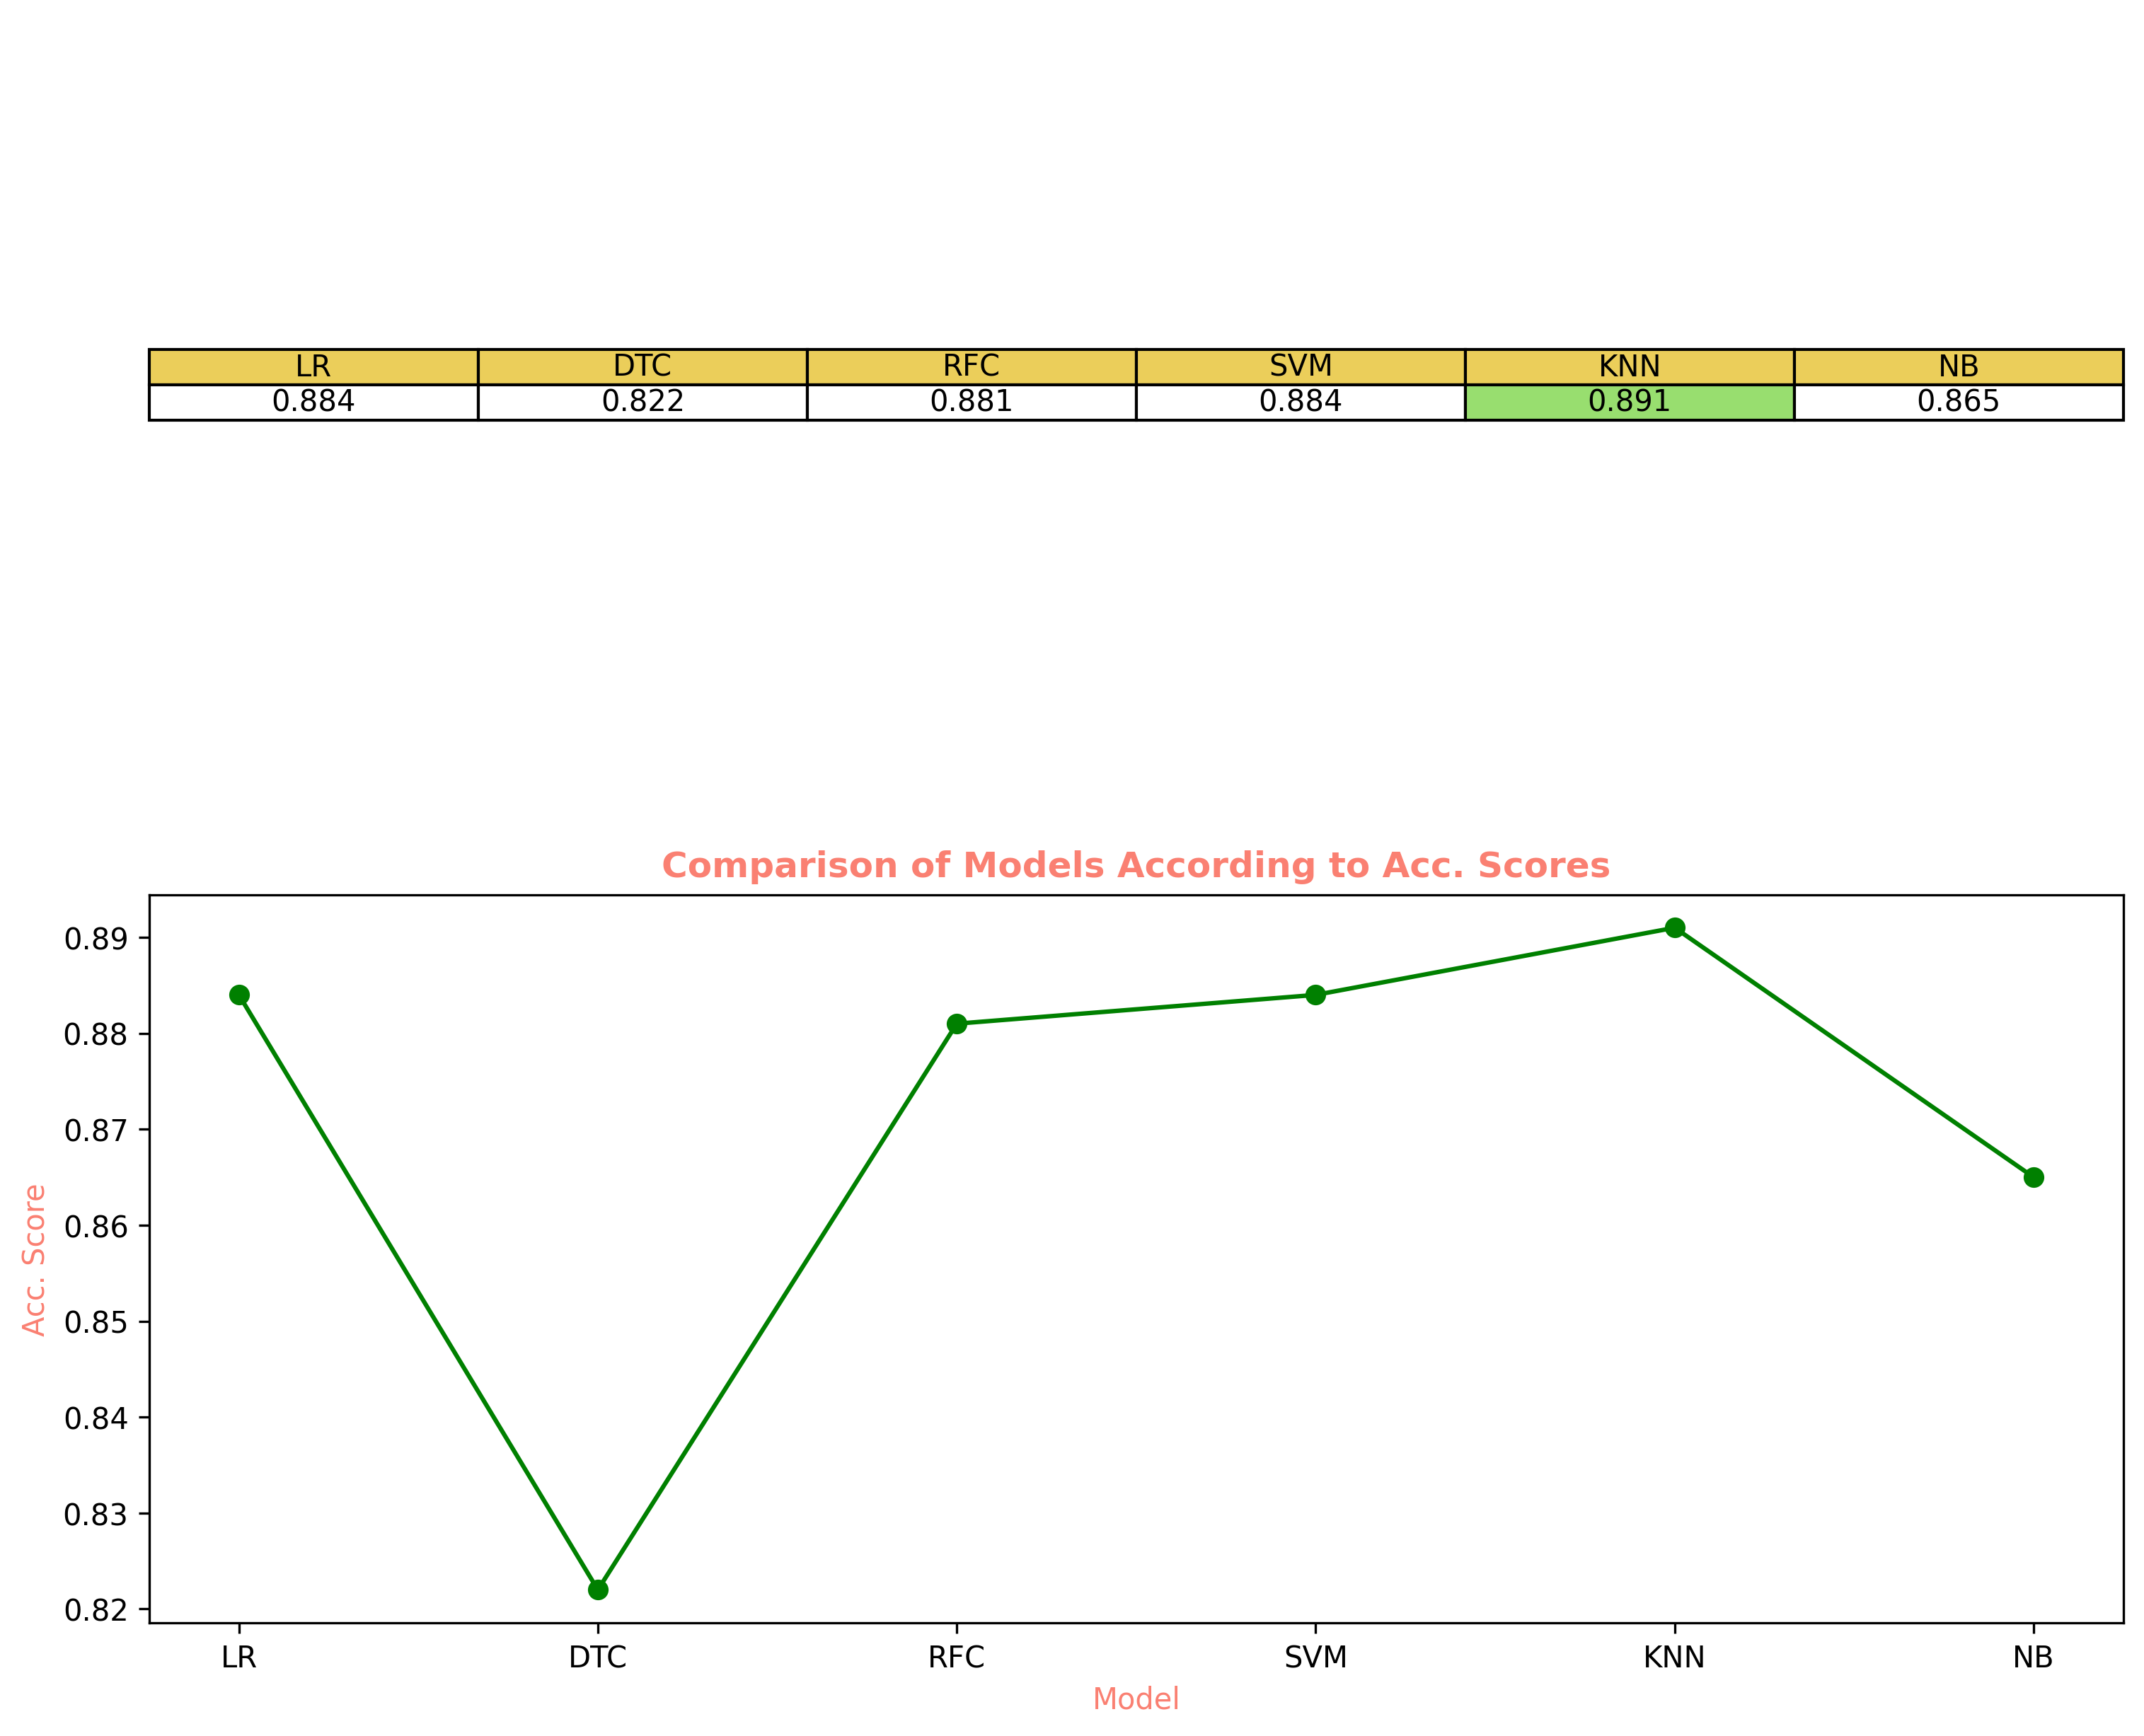

In [33]:
model.accuracy_scores()

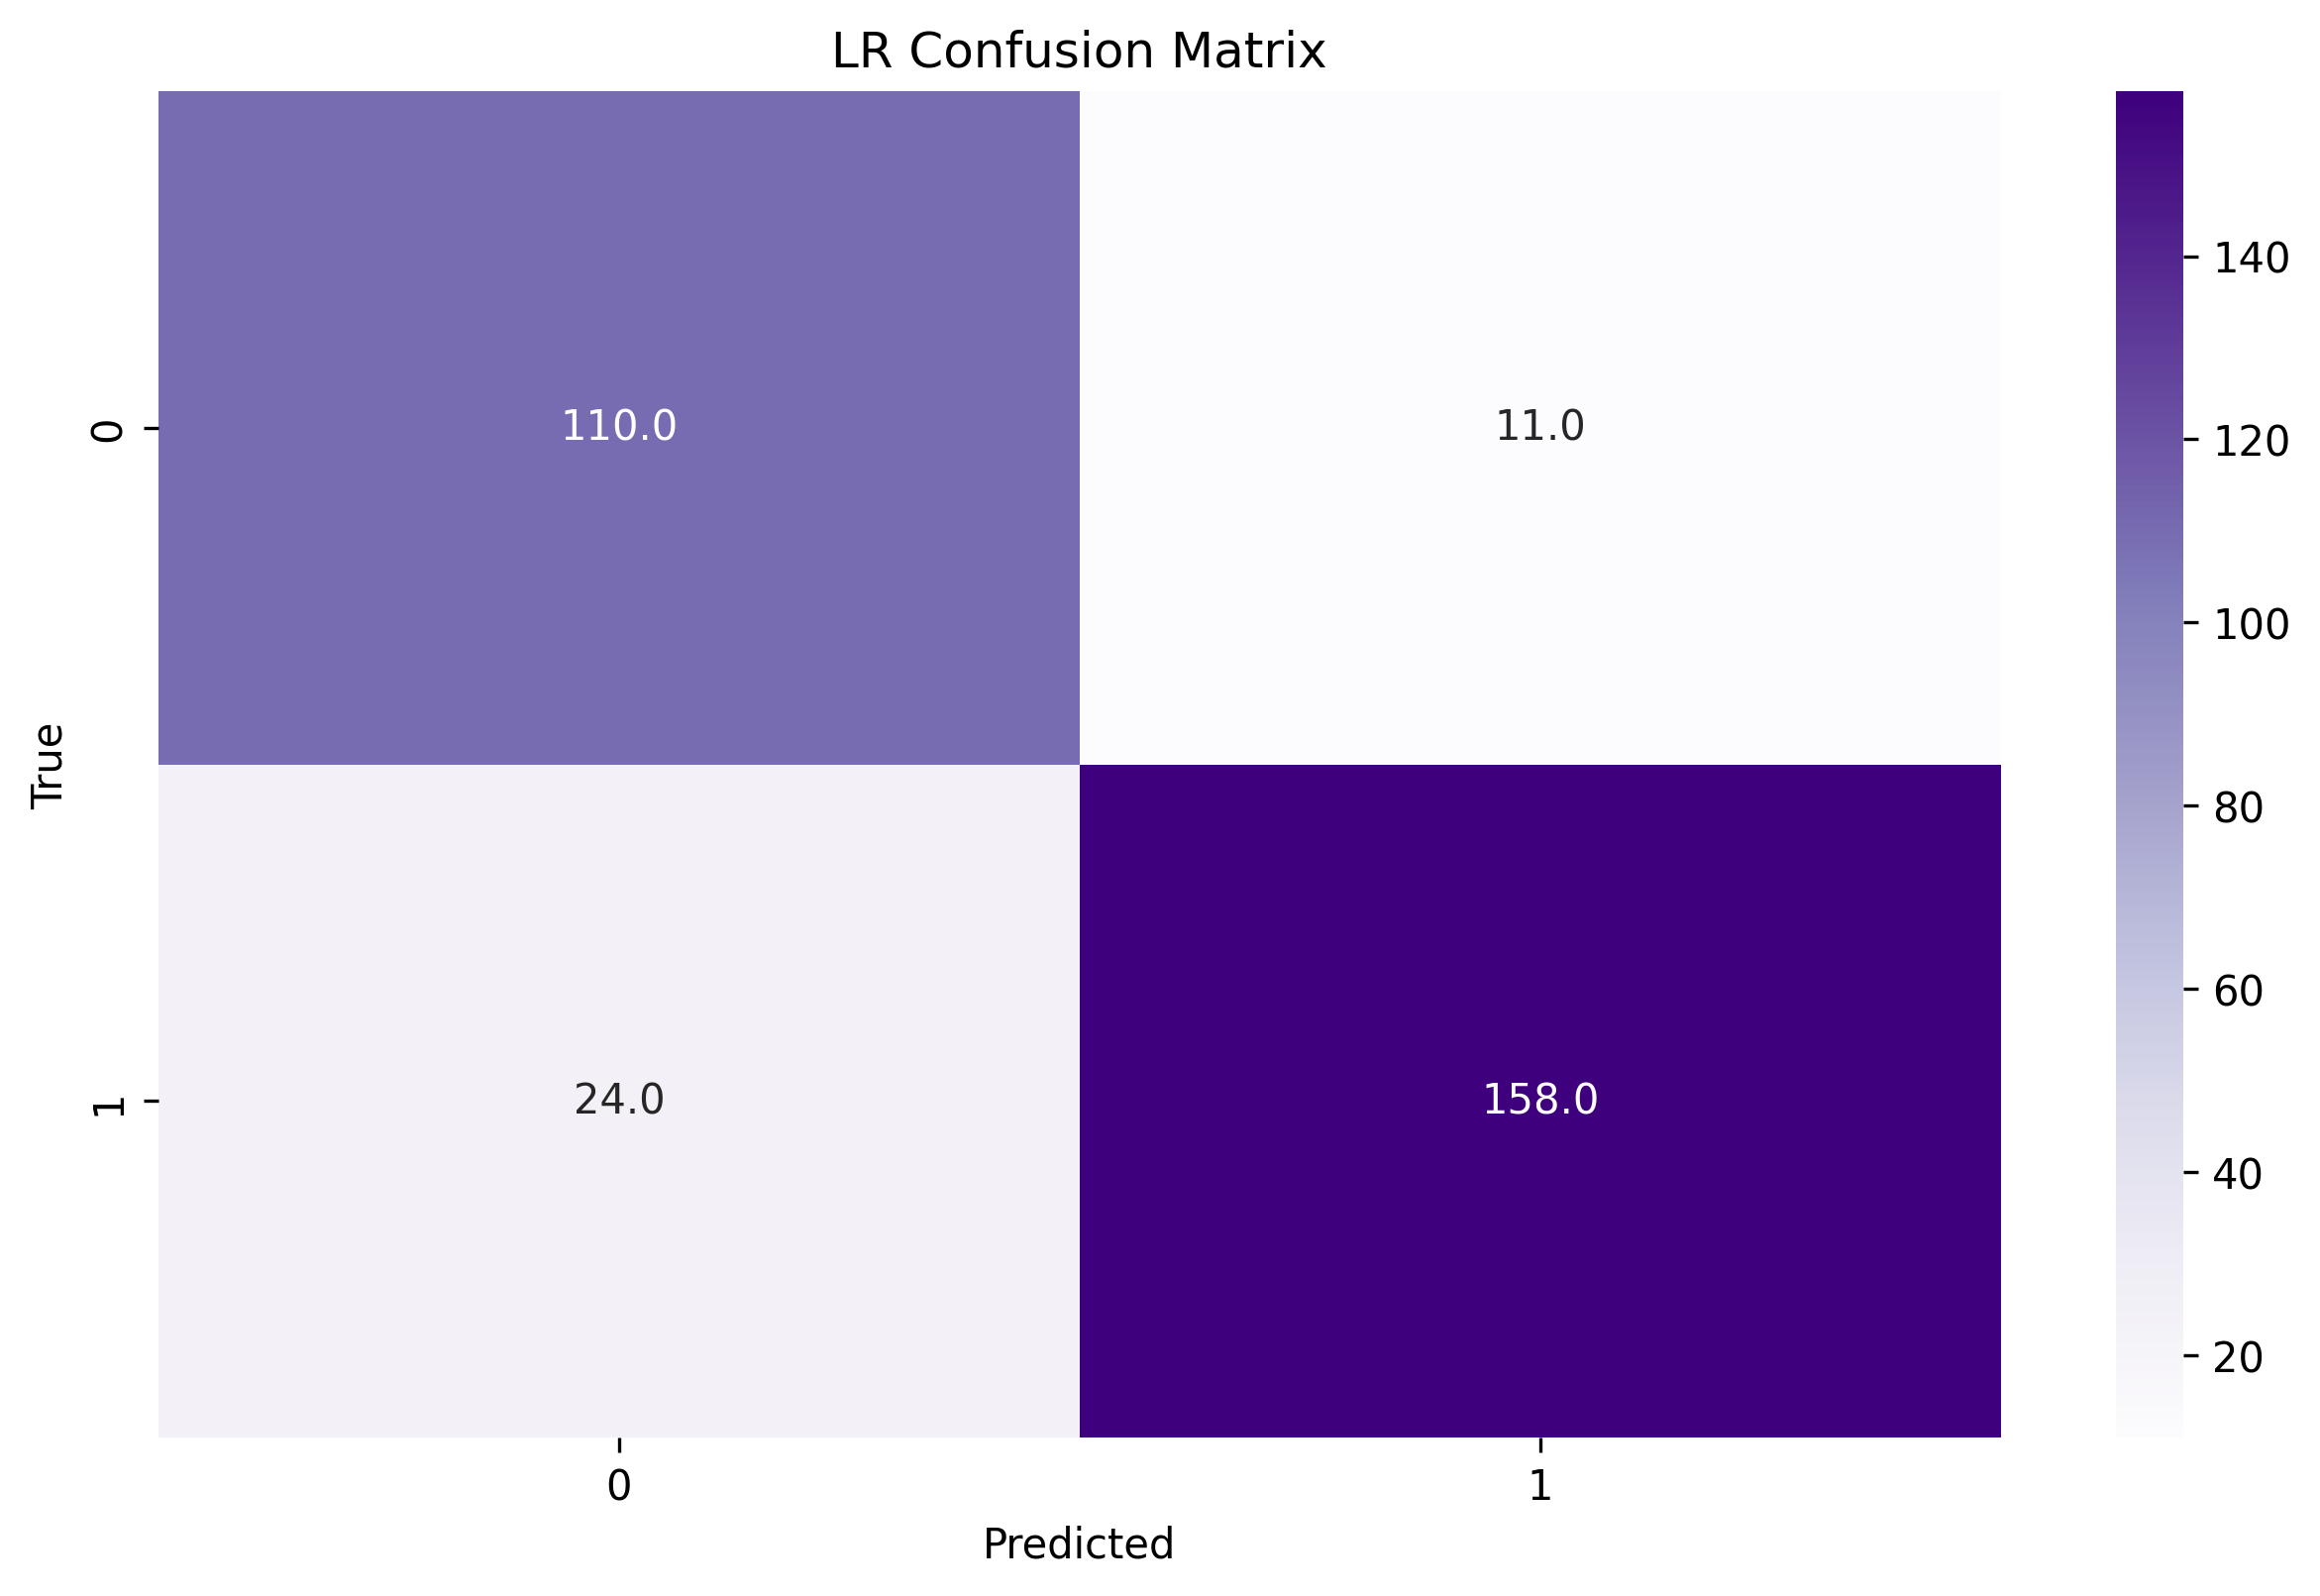

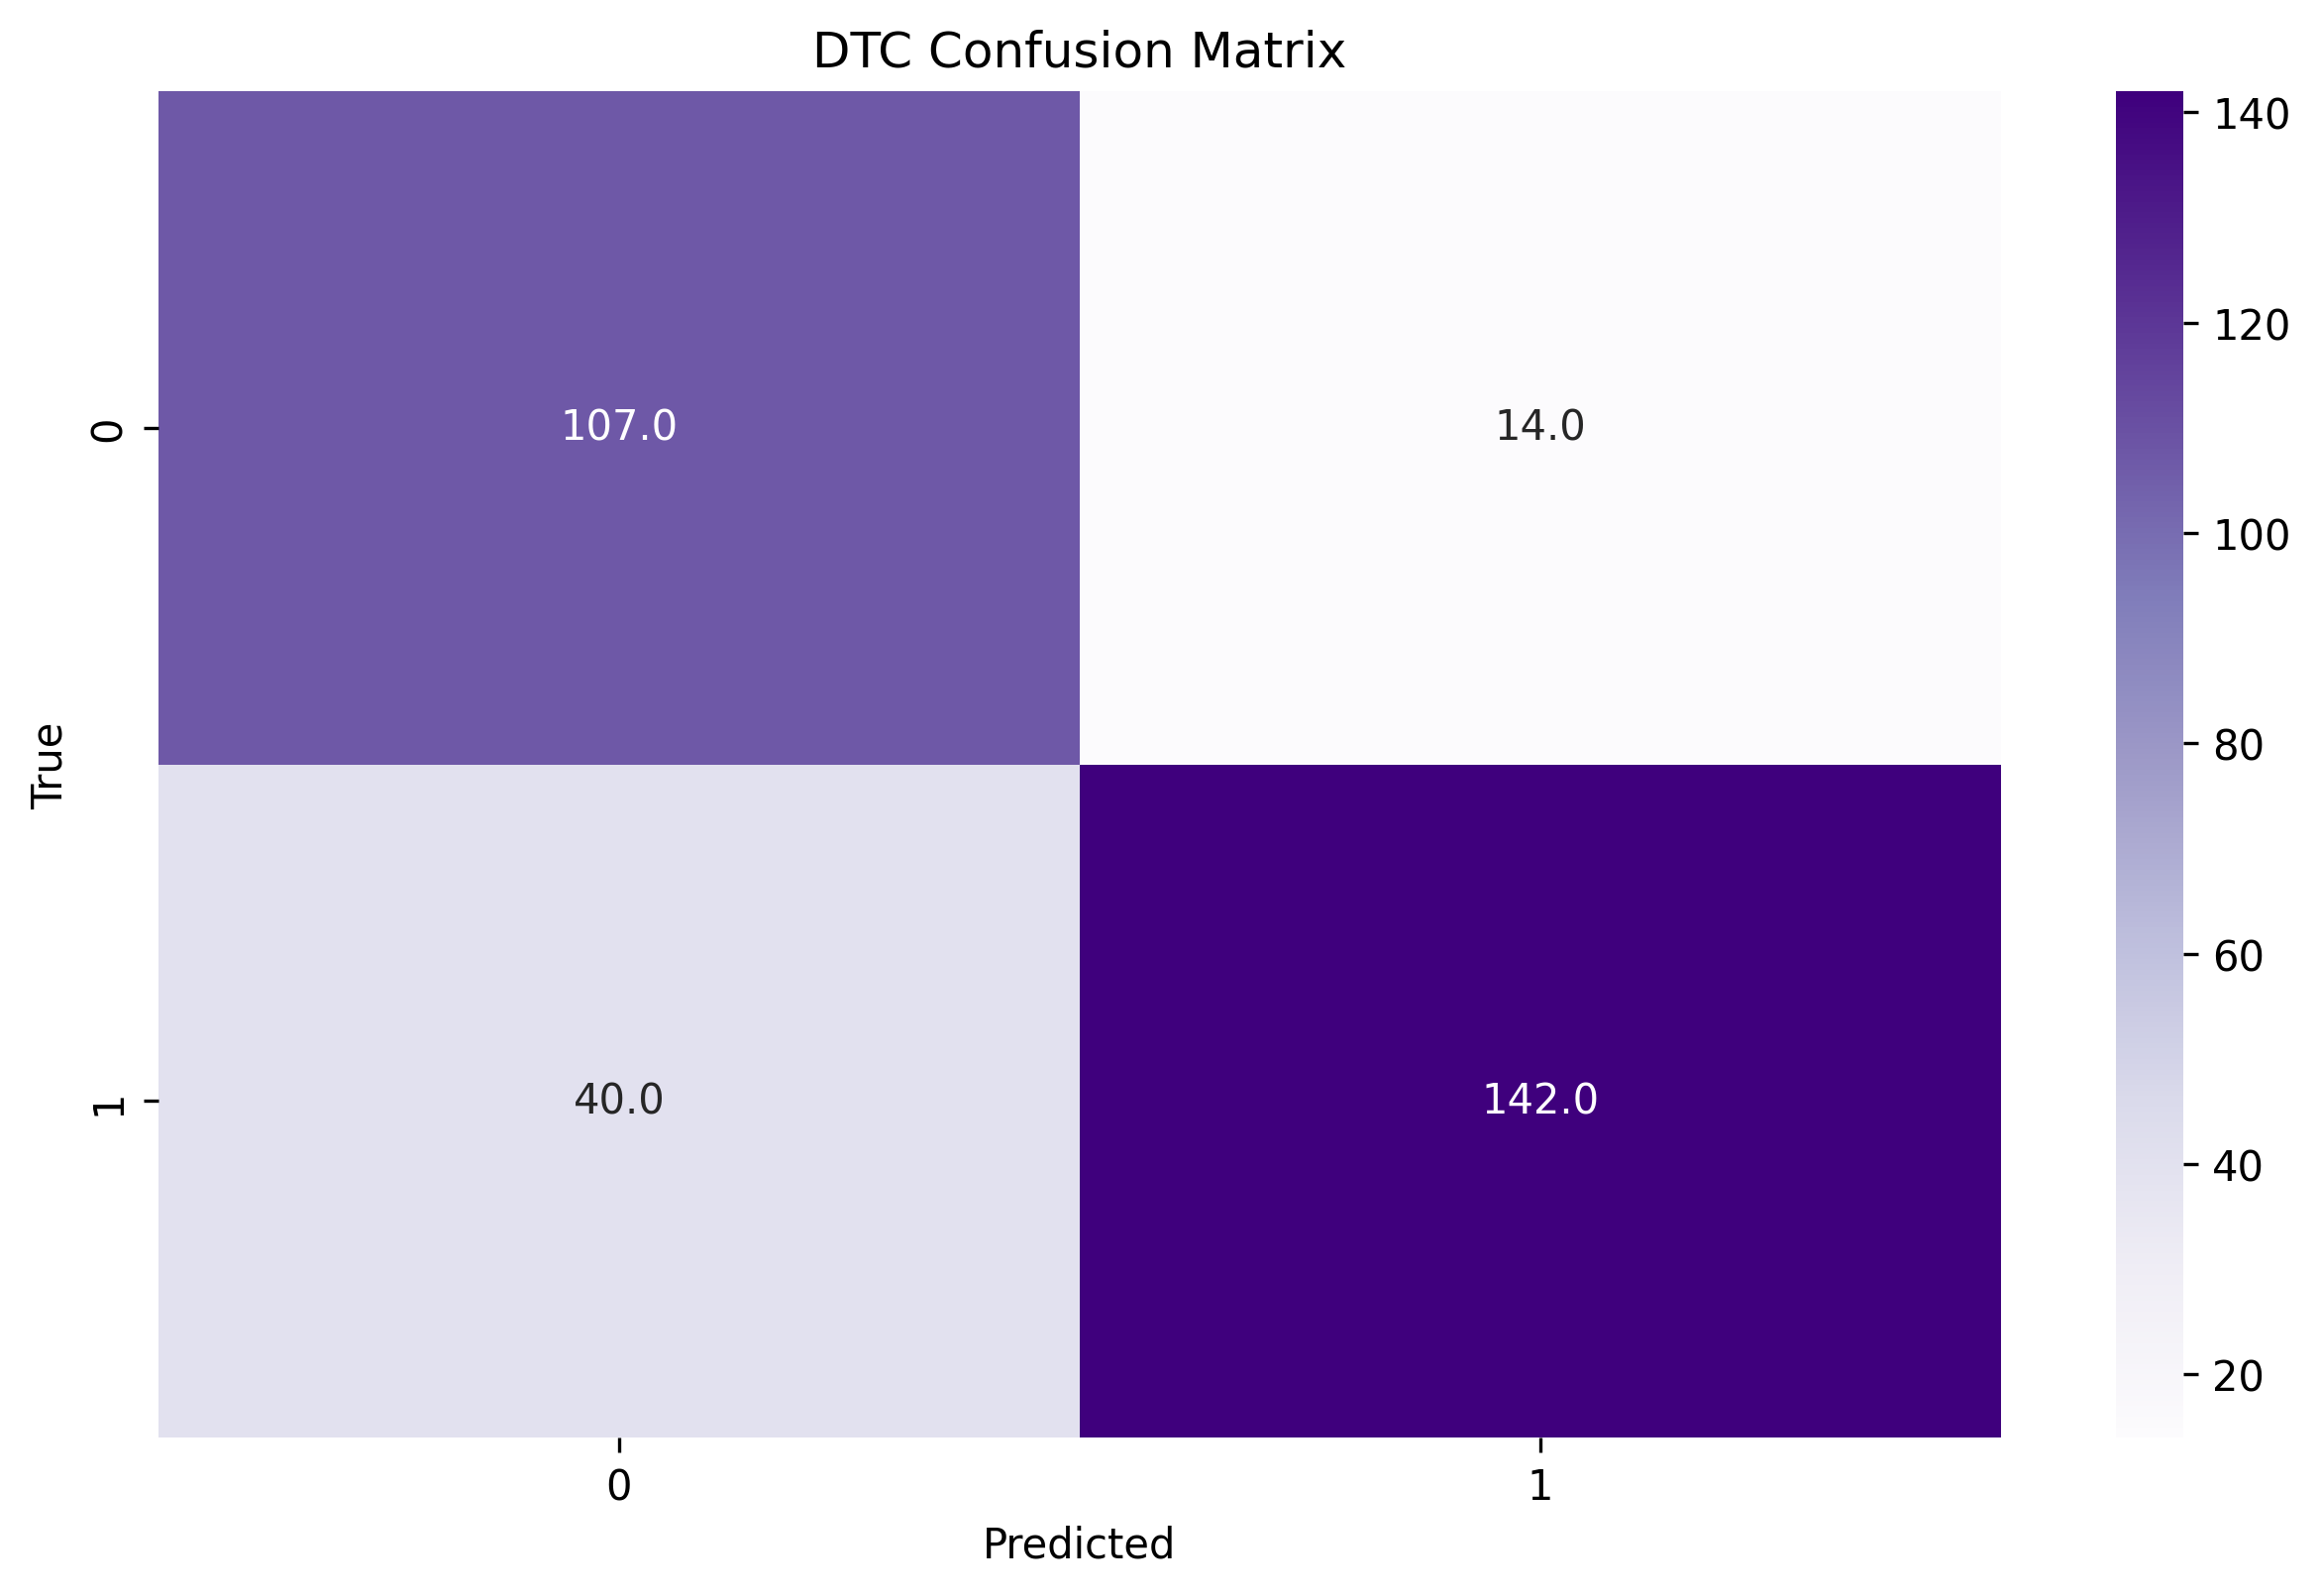

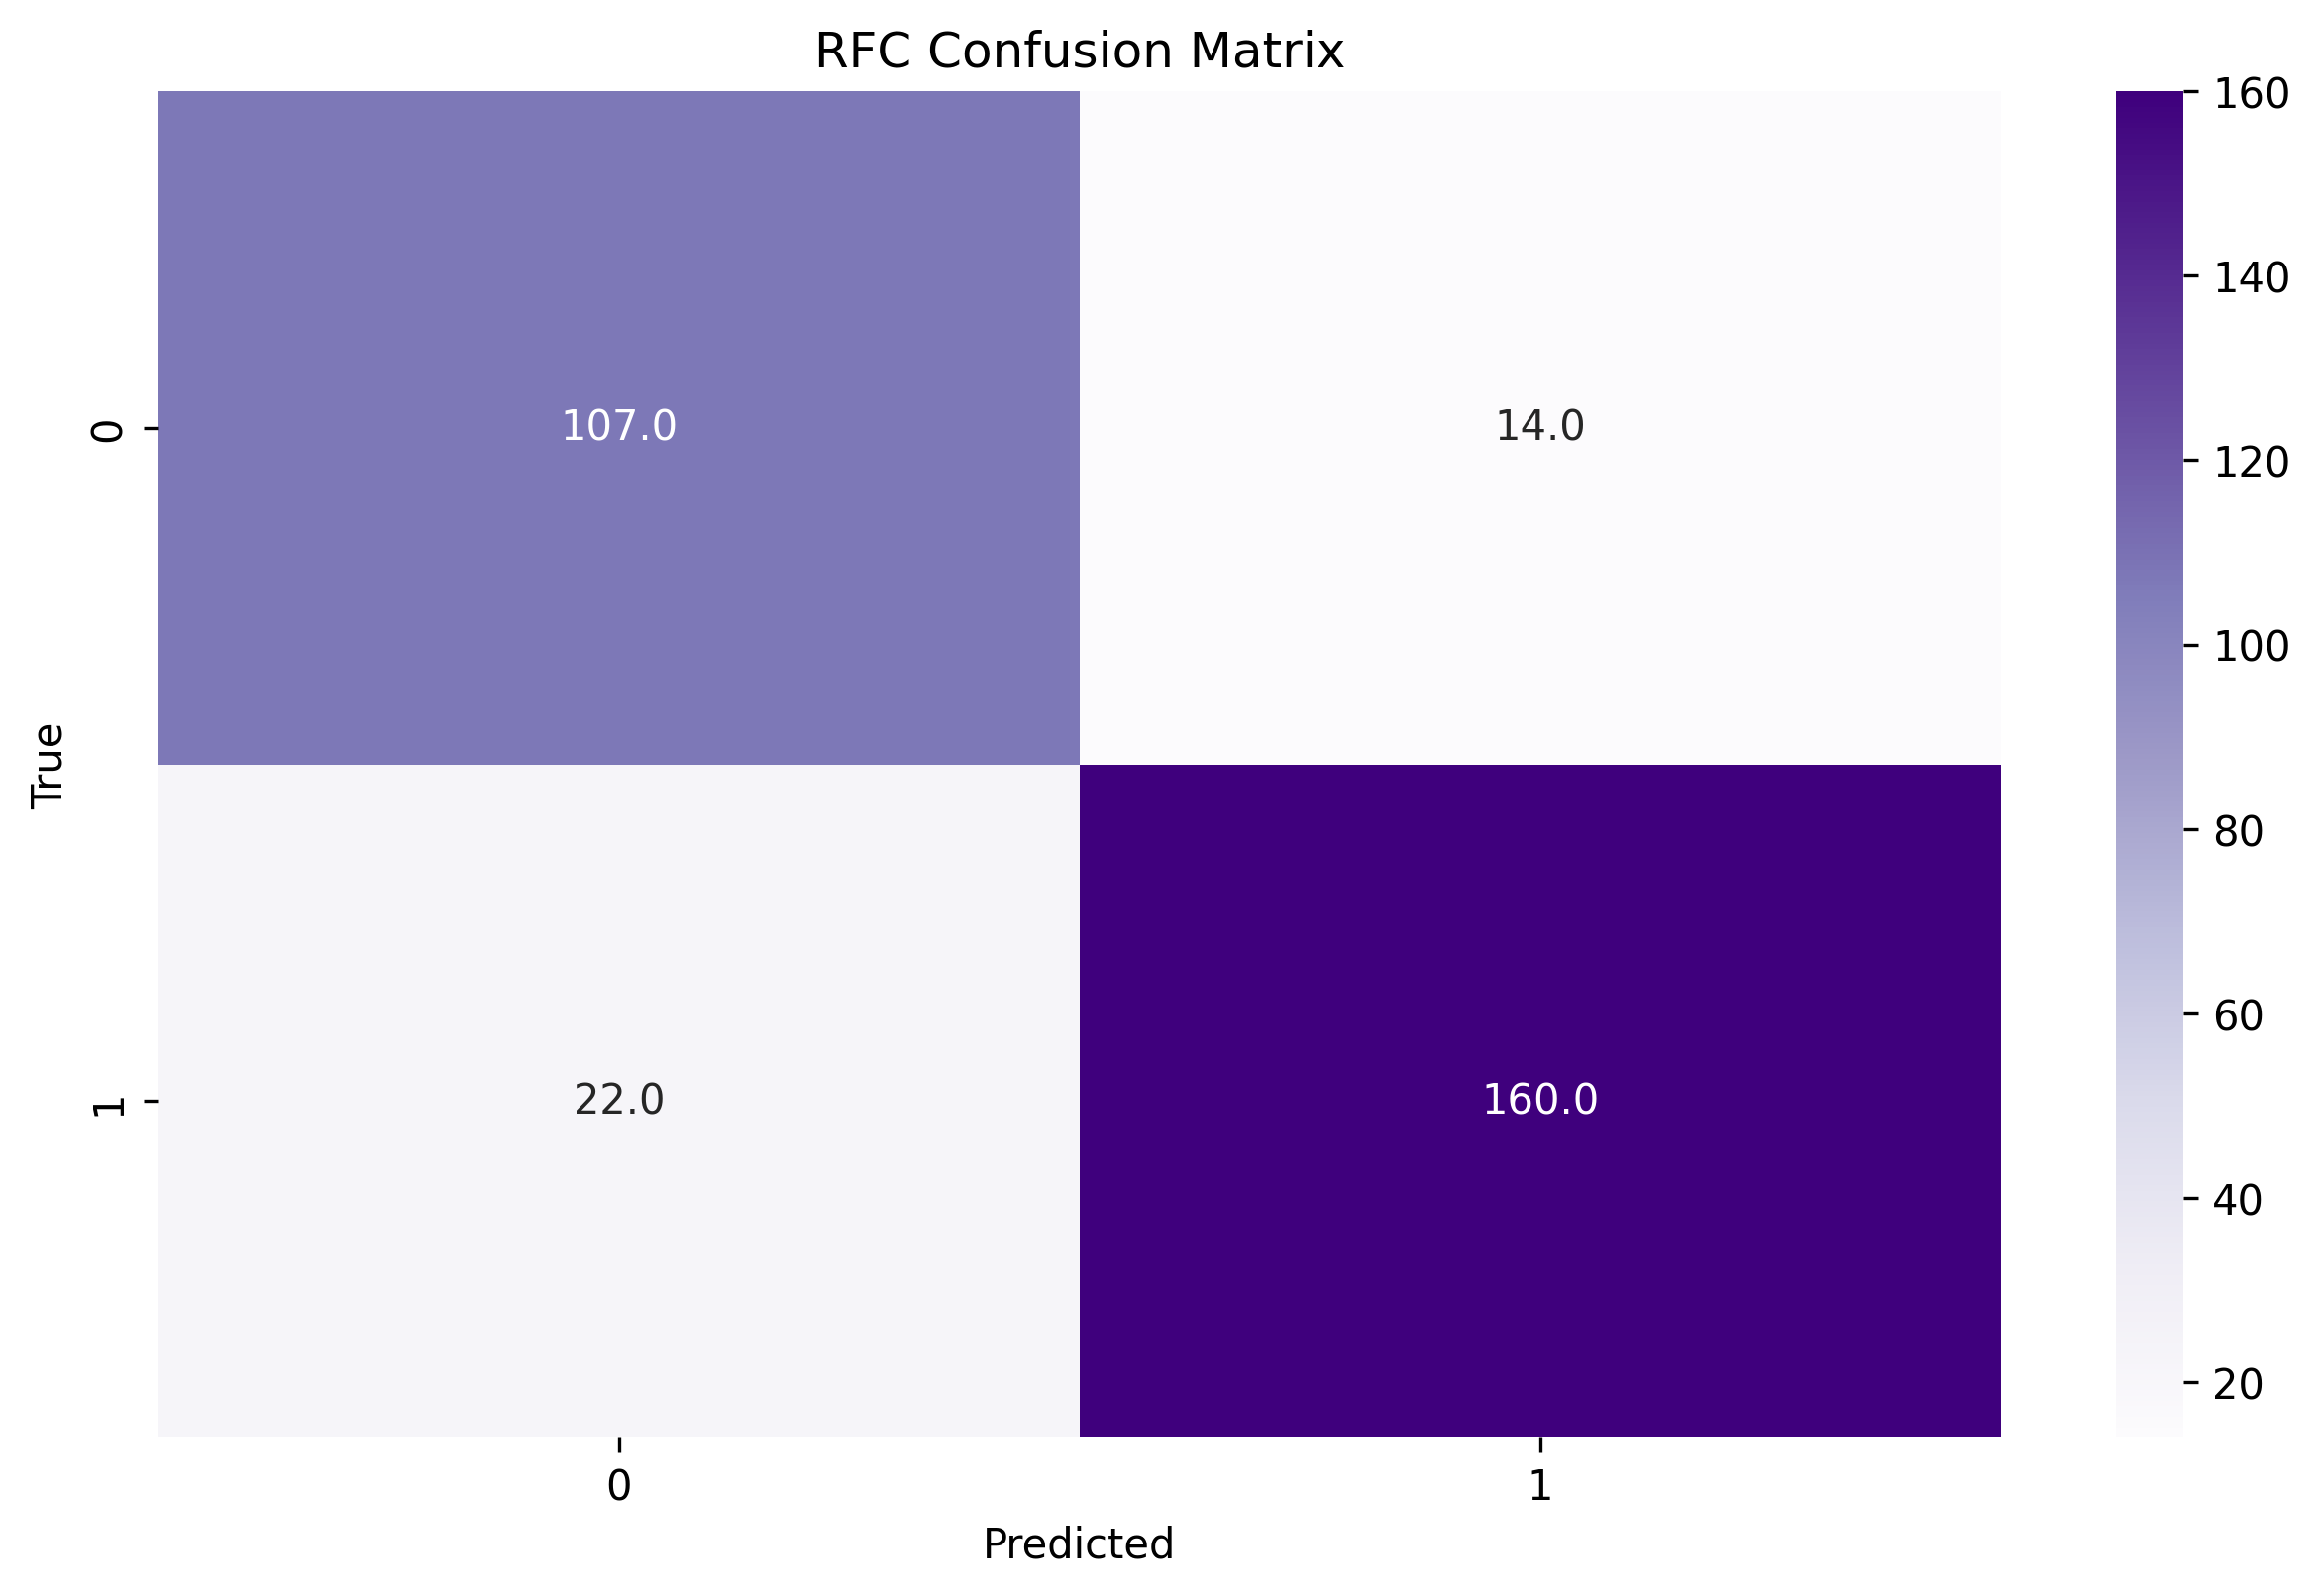

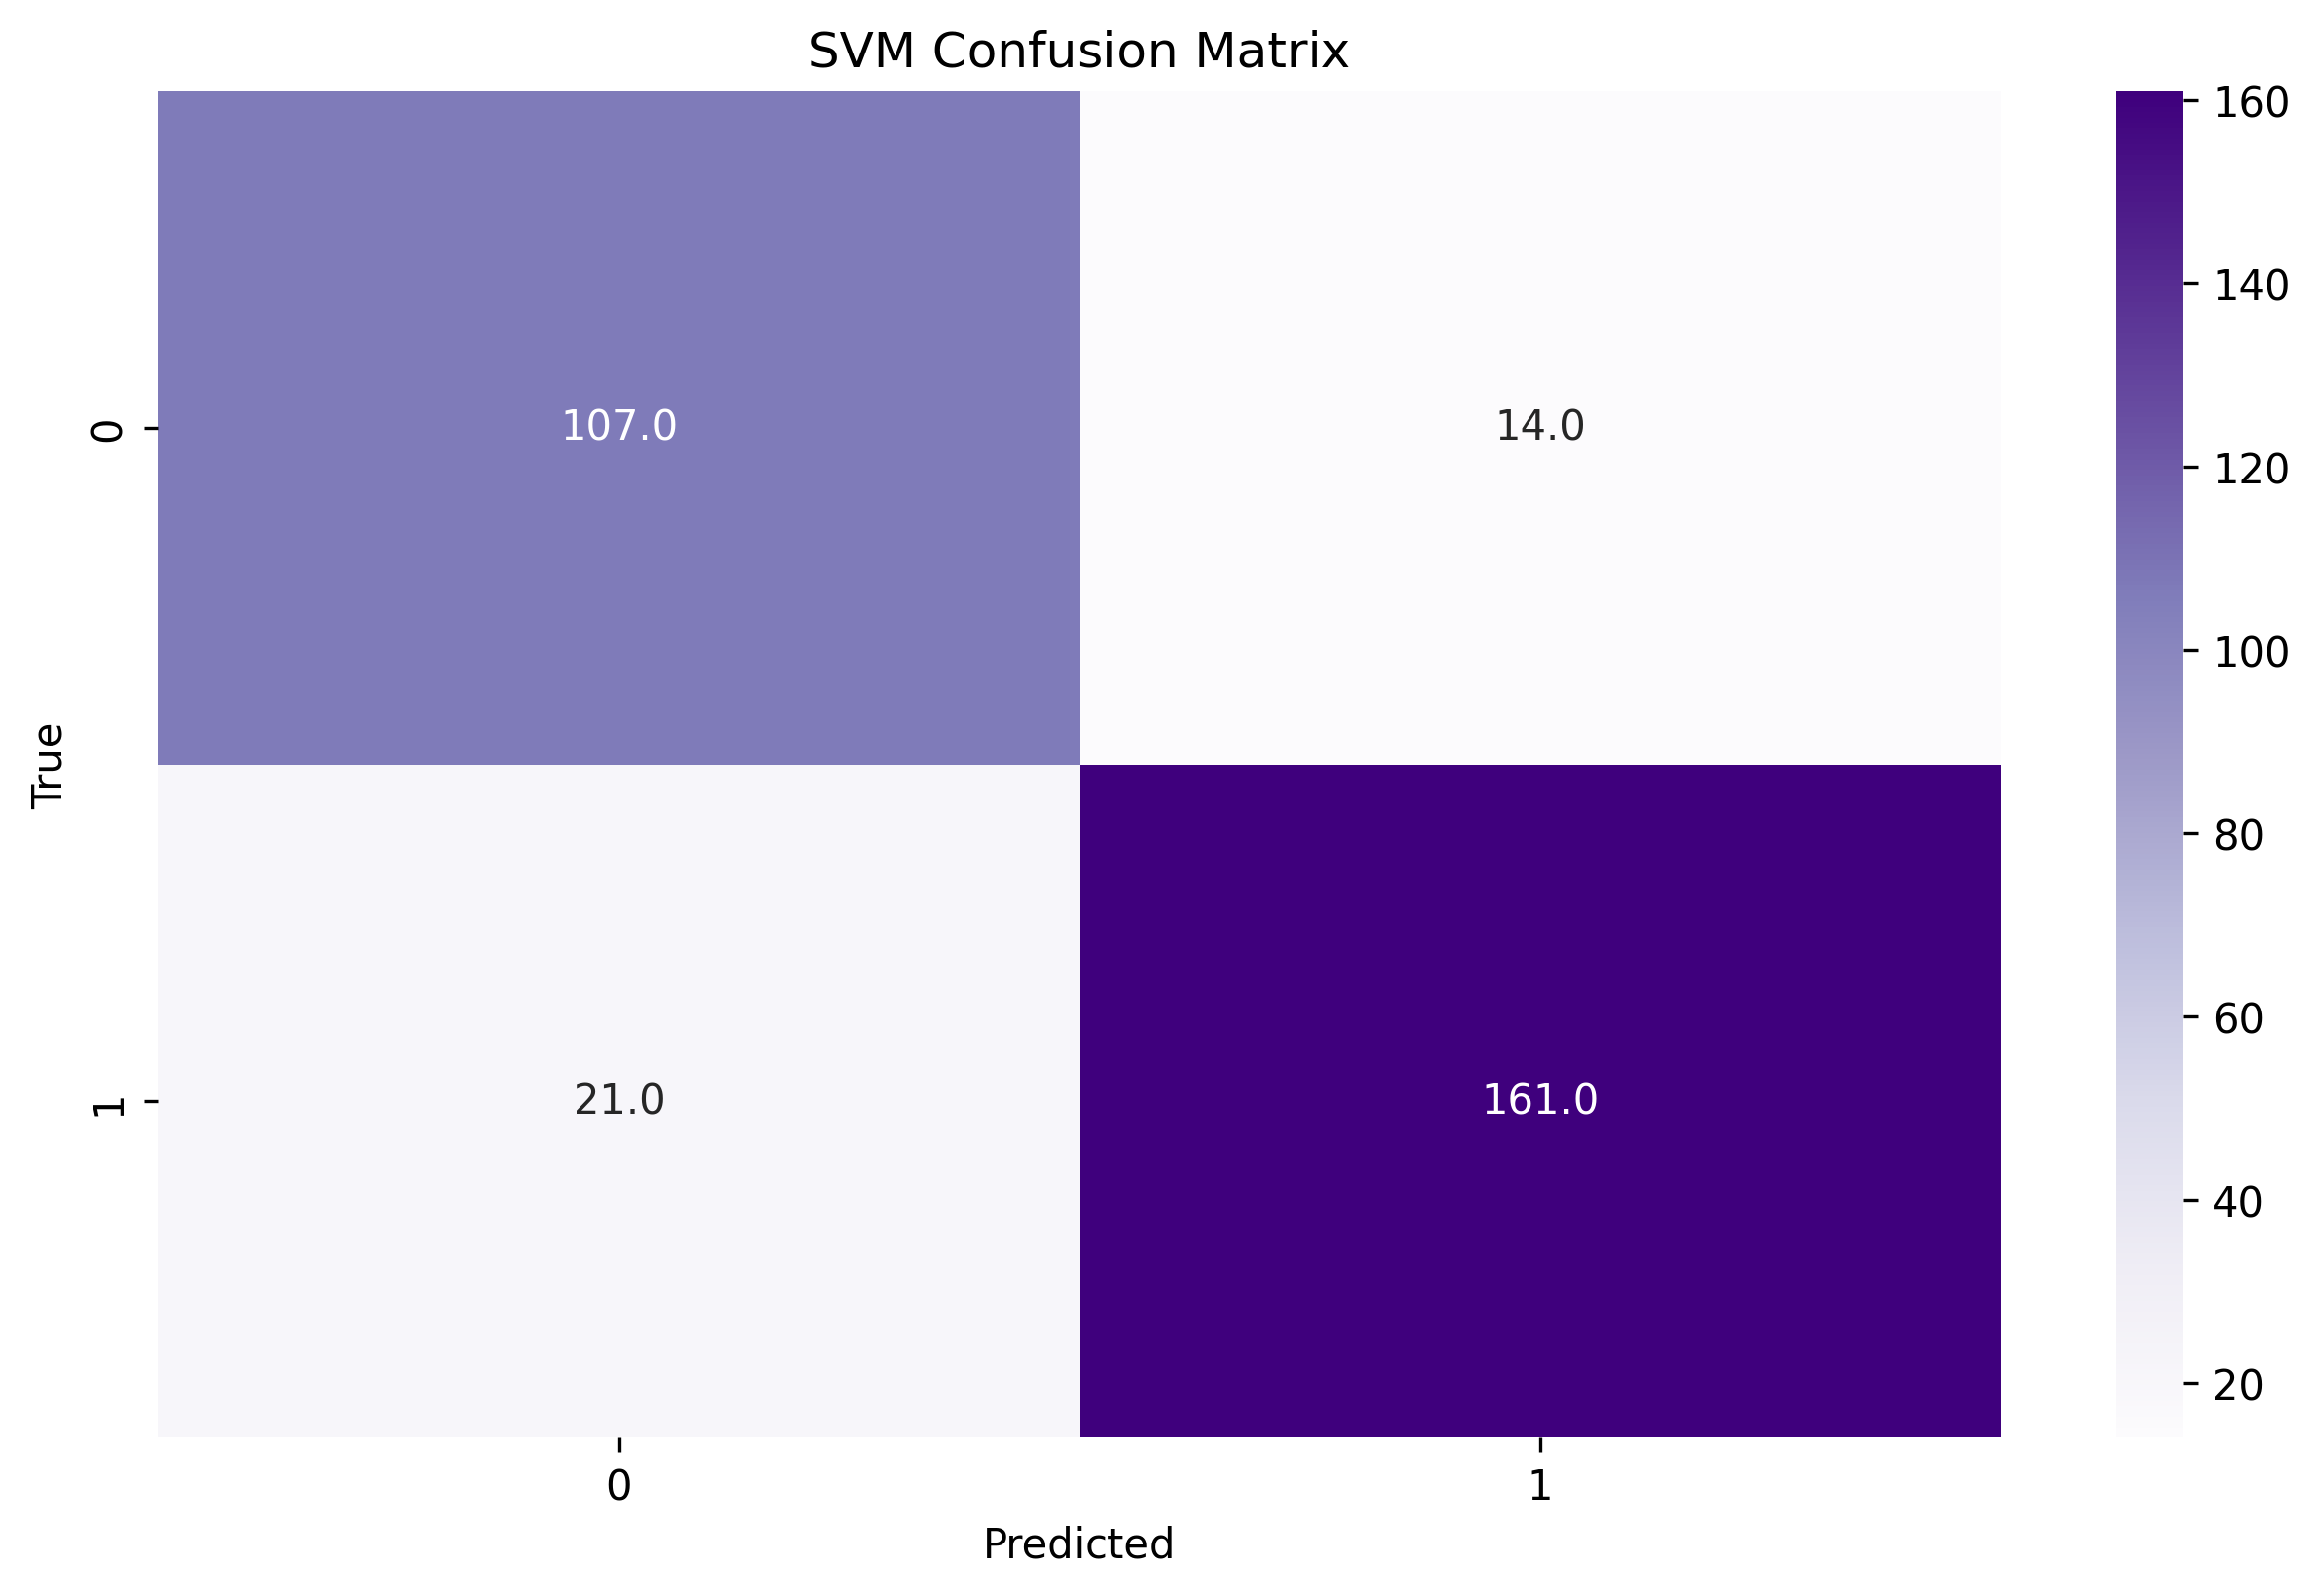

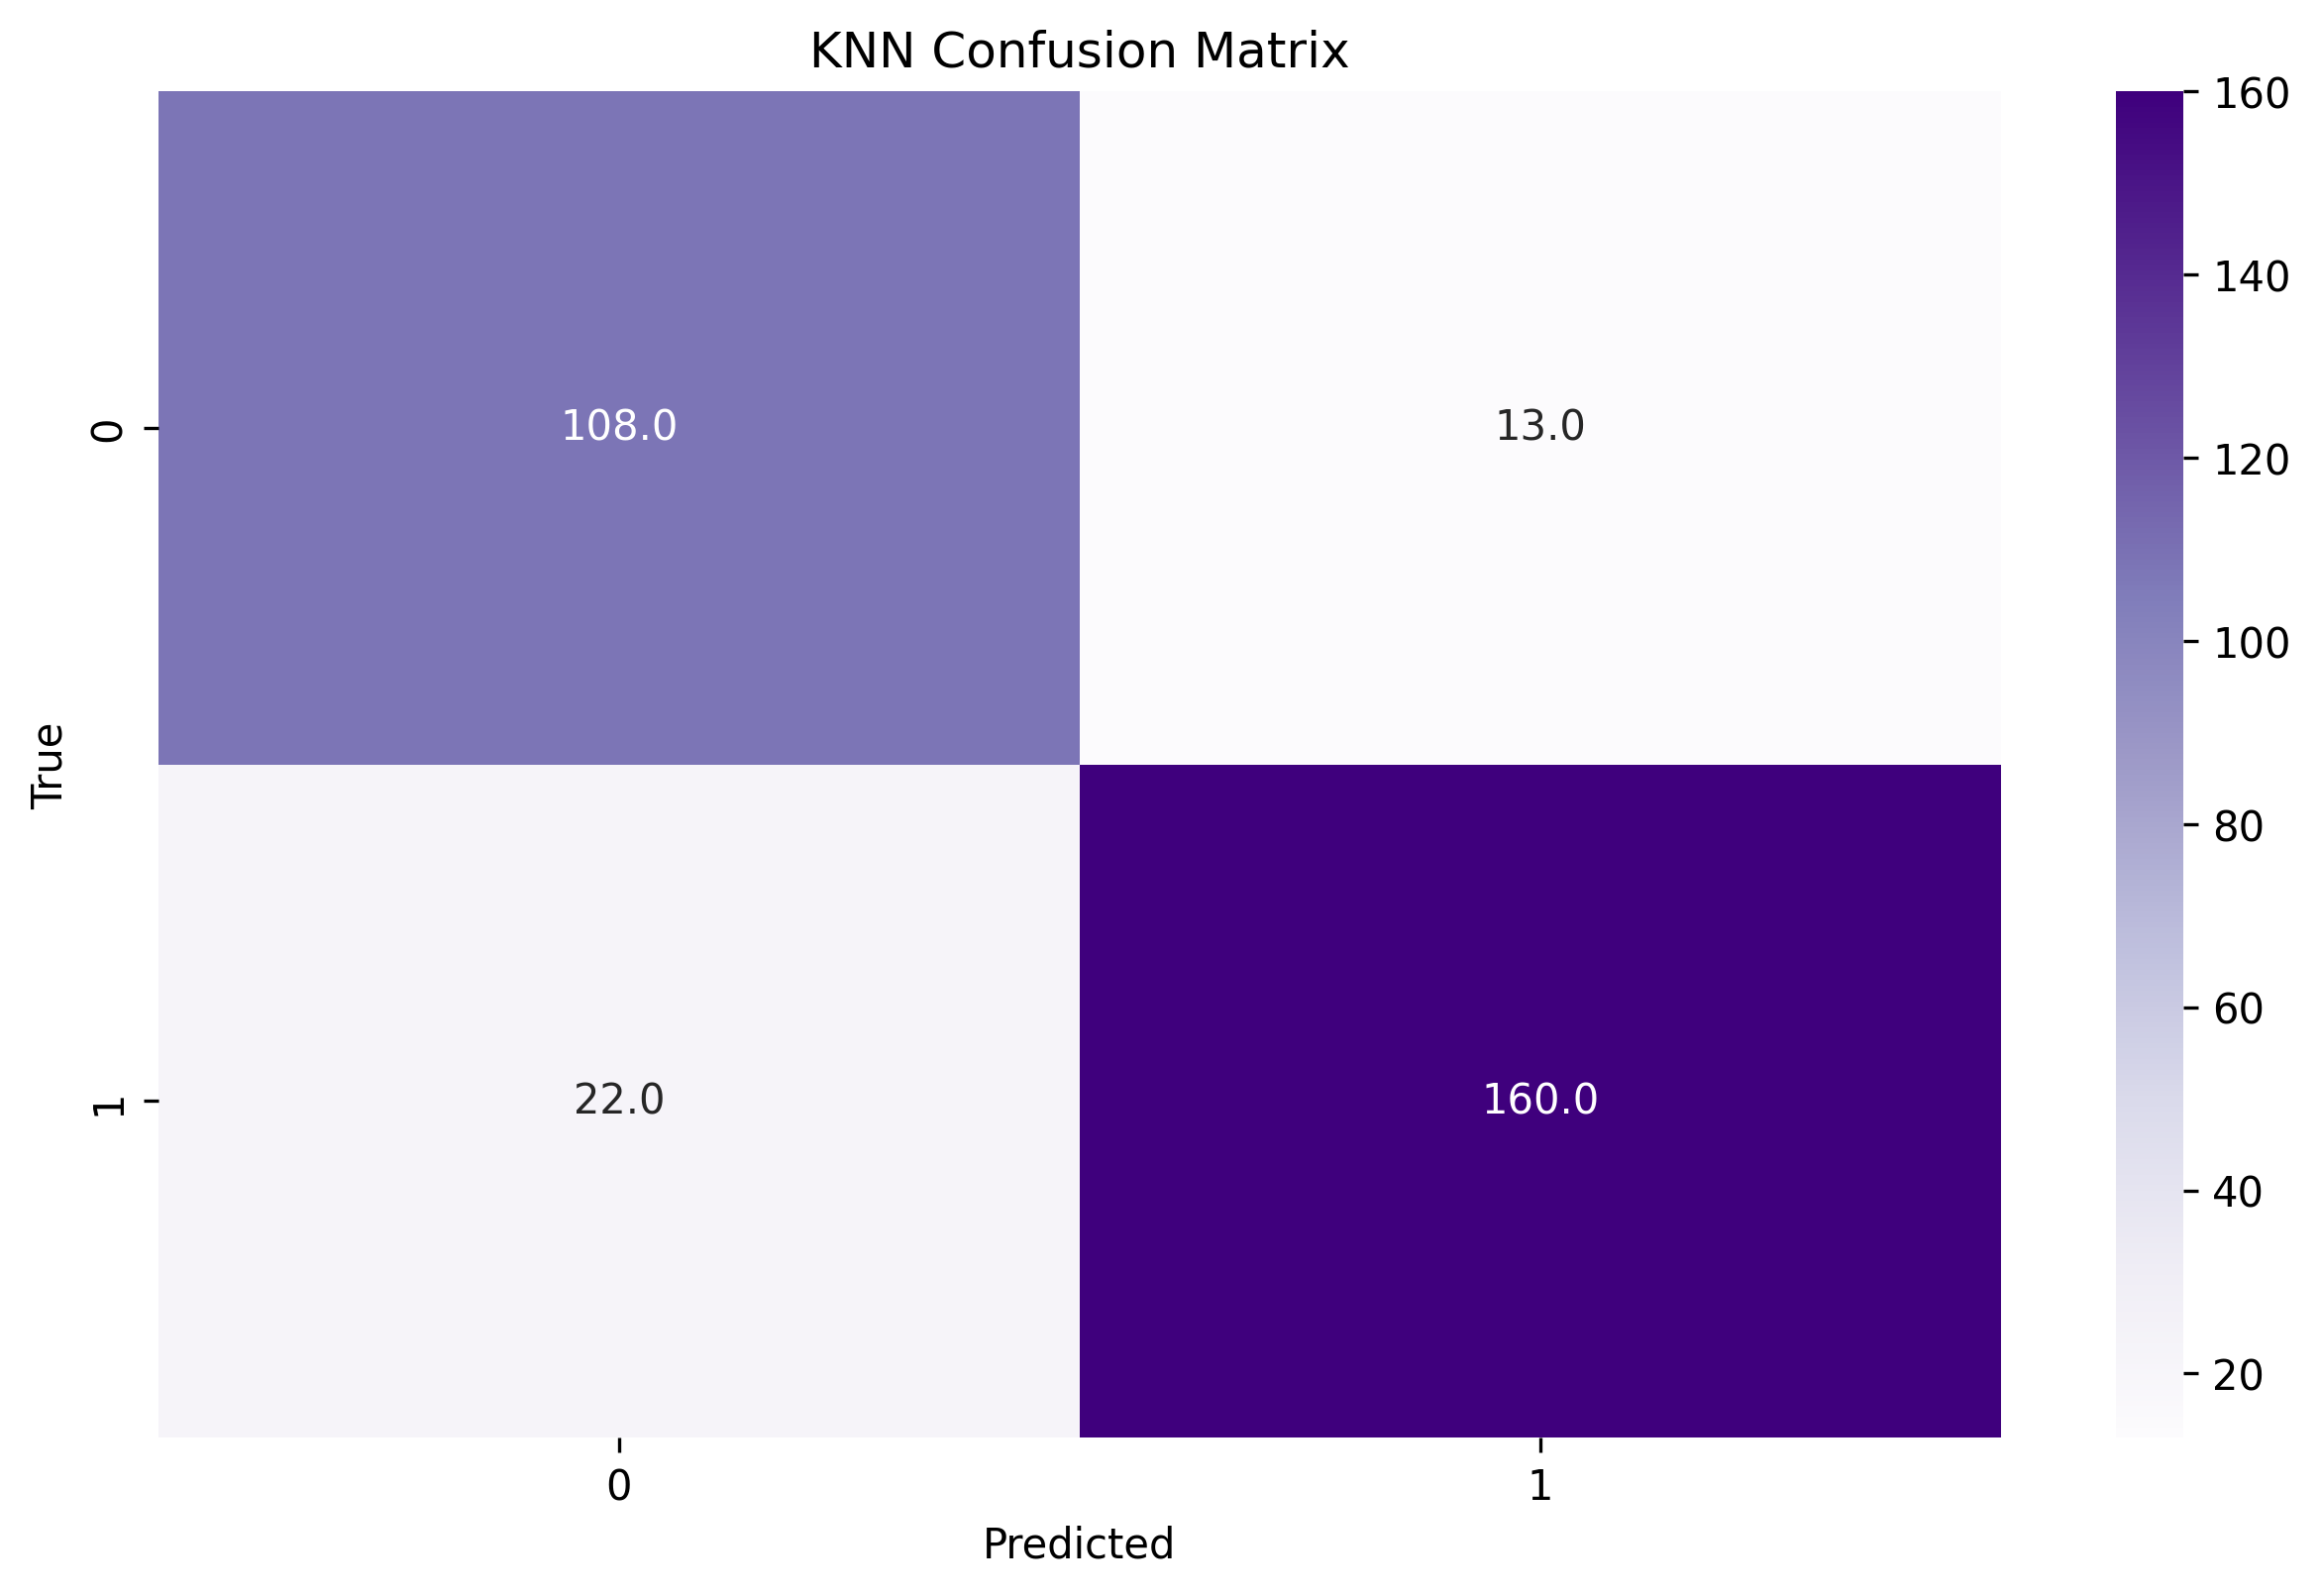

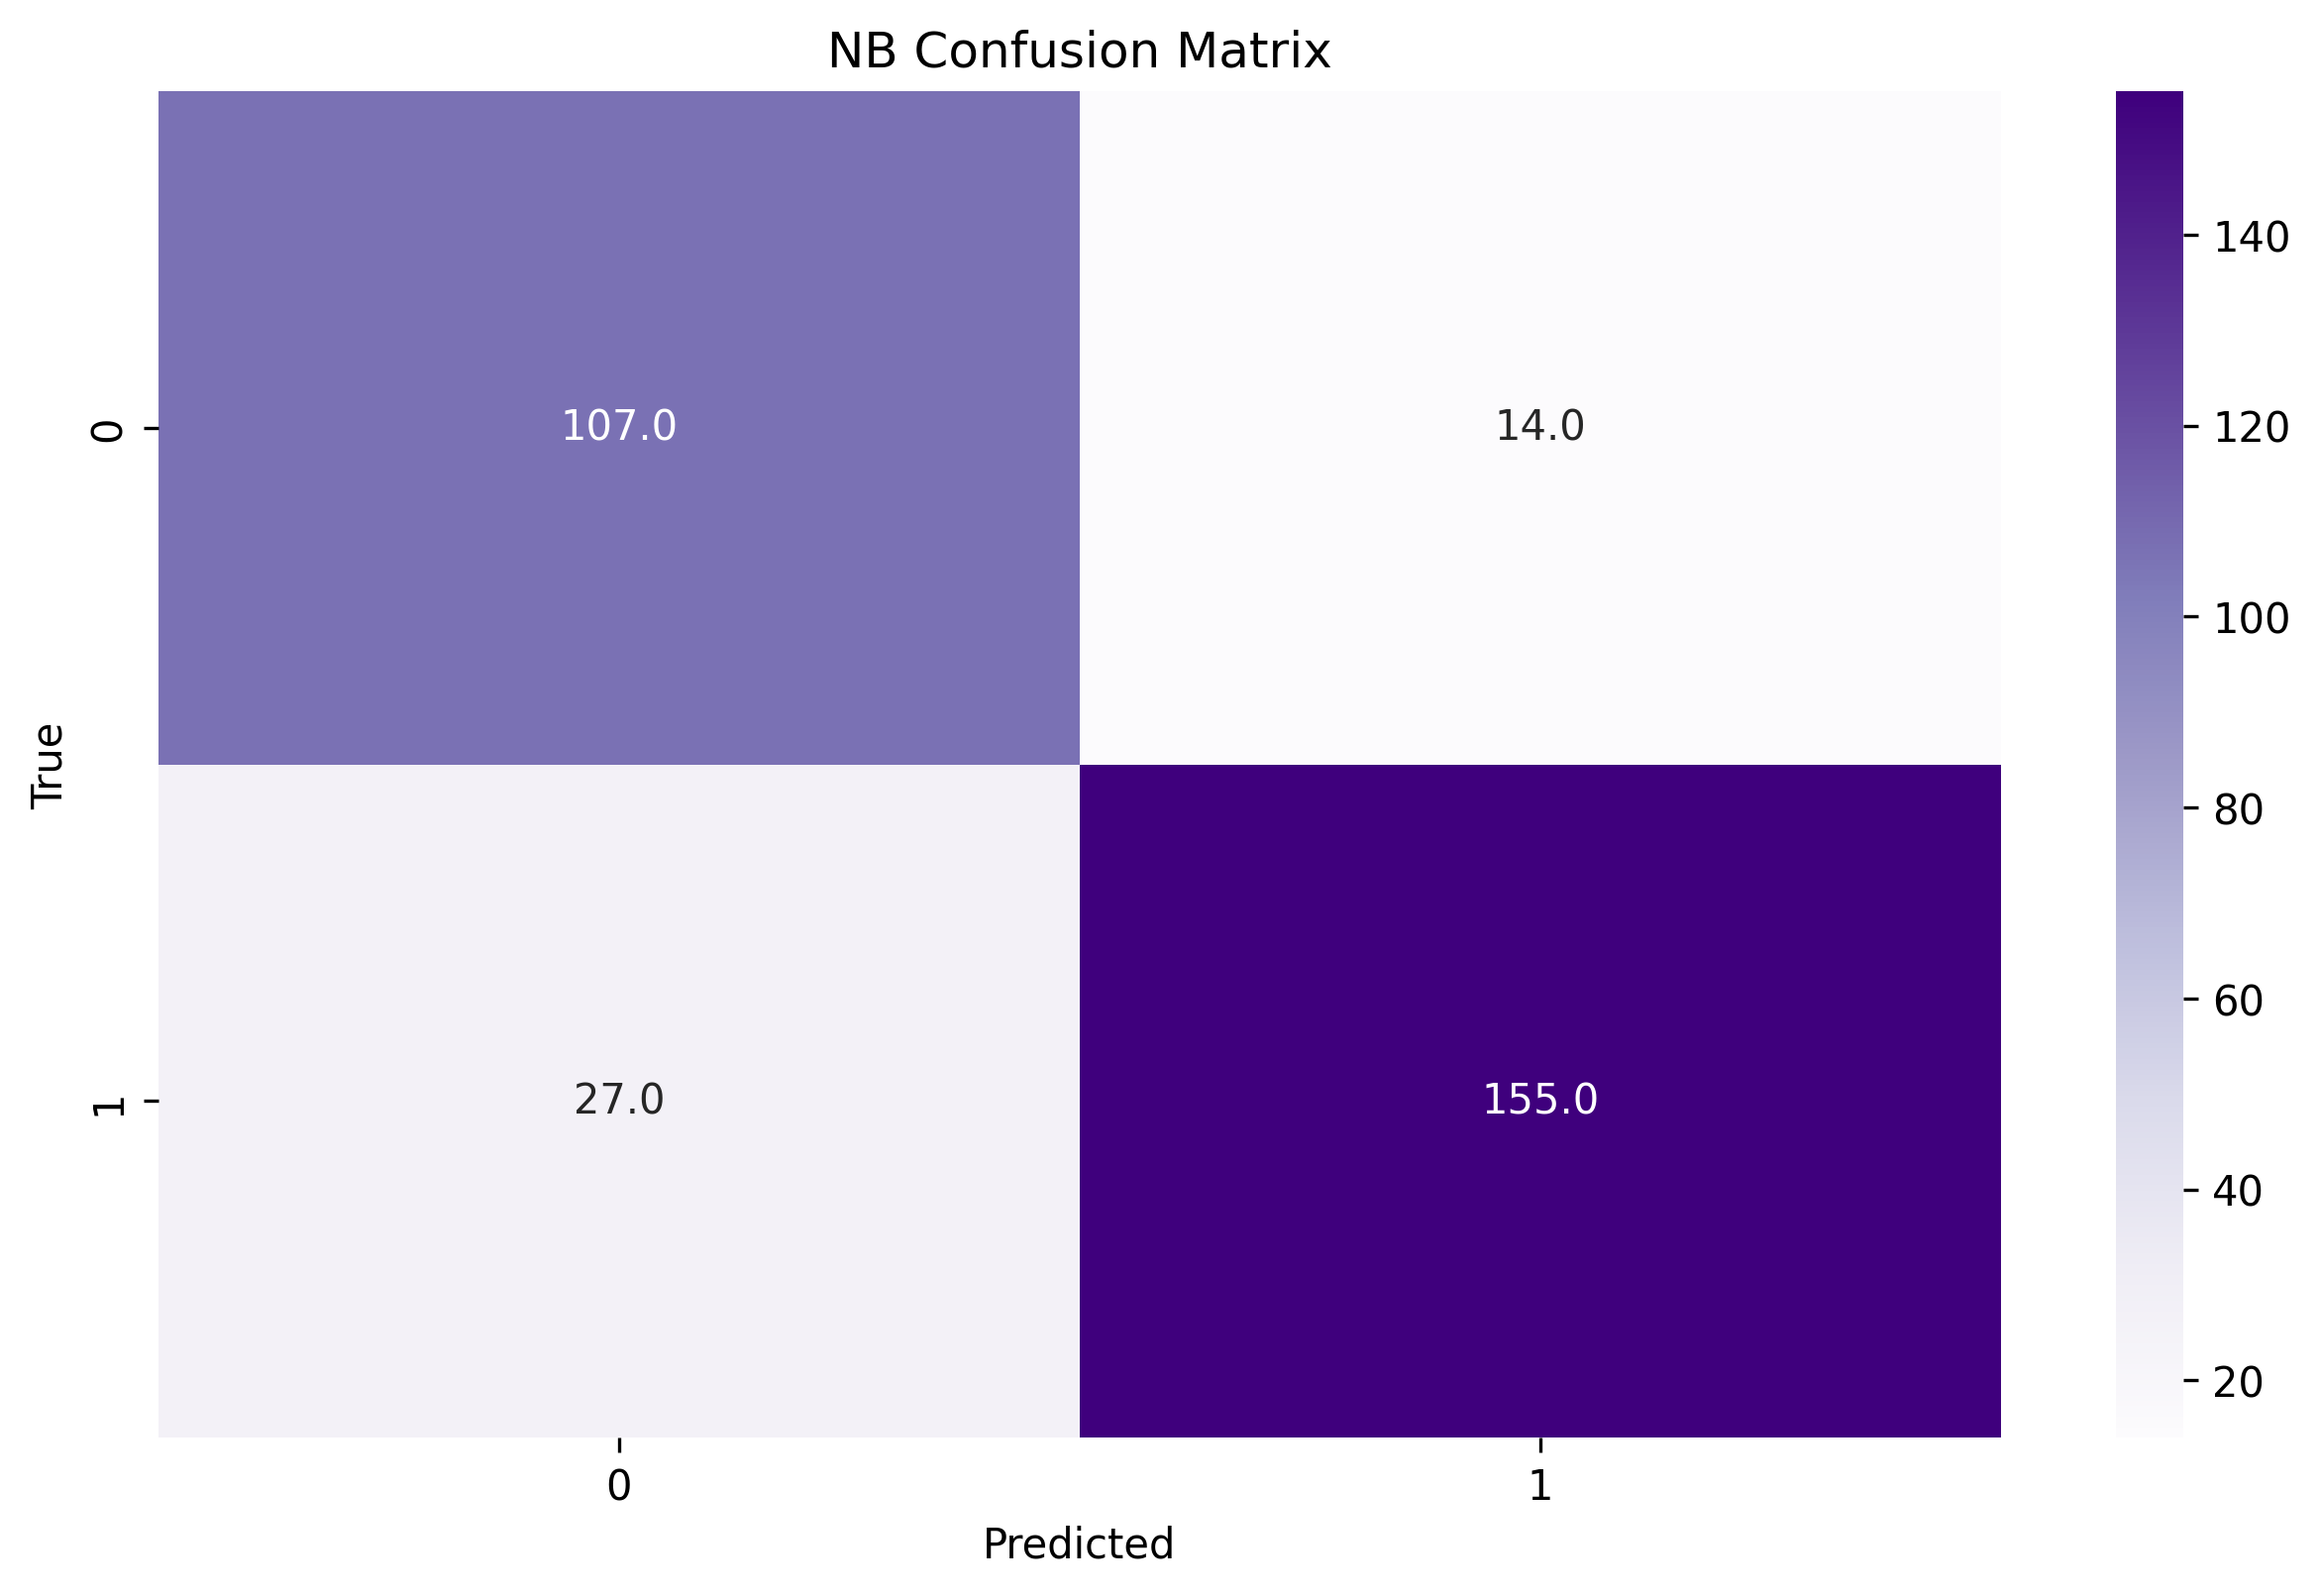

In [34]:
model.con_matrix()

In [35]:
model.classification_reports()

LR

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       121
           1       0.93      0.87      0.90       182

    accuracy                           0.88       303
   macro avg       0.88      0.89      0.88       303
weighted avg       0.89      0.88      0.89       303

*****************************************************

DTC

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       121
           1       0.91      0.78      0.84       182

    accuracy                           0.82       303
   macro avg       0.82      0.83      0.82       303
weighted avg       0.84      0.82      0.82       303

*****************************************************

RFC

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       121
           1       0.92      0.88      0.90       182

    accuracy                           0.88       303
   m

## Cross Validation 

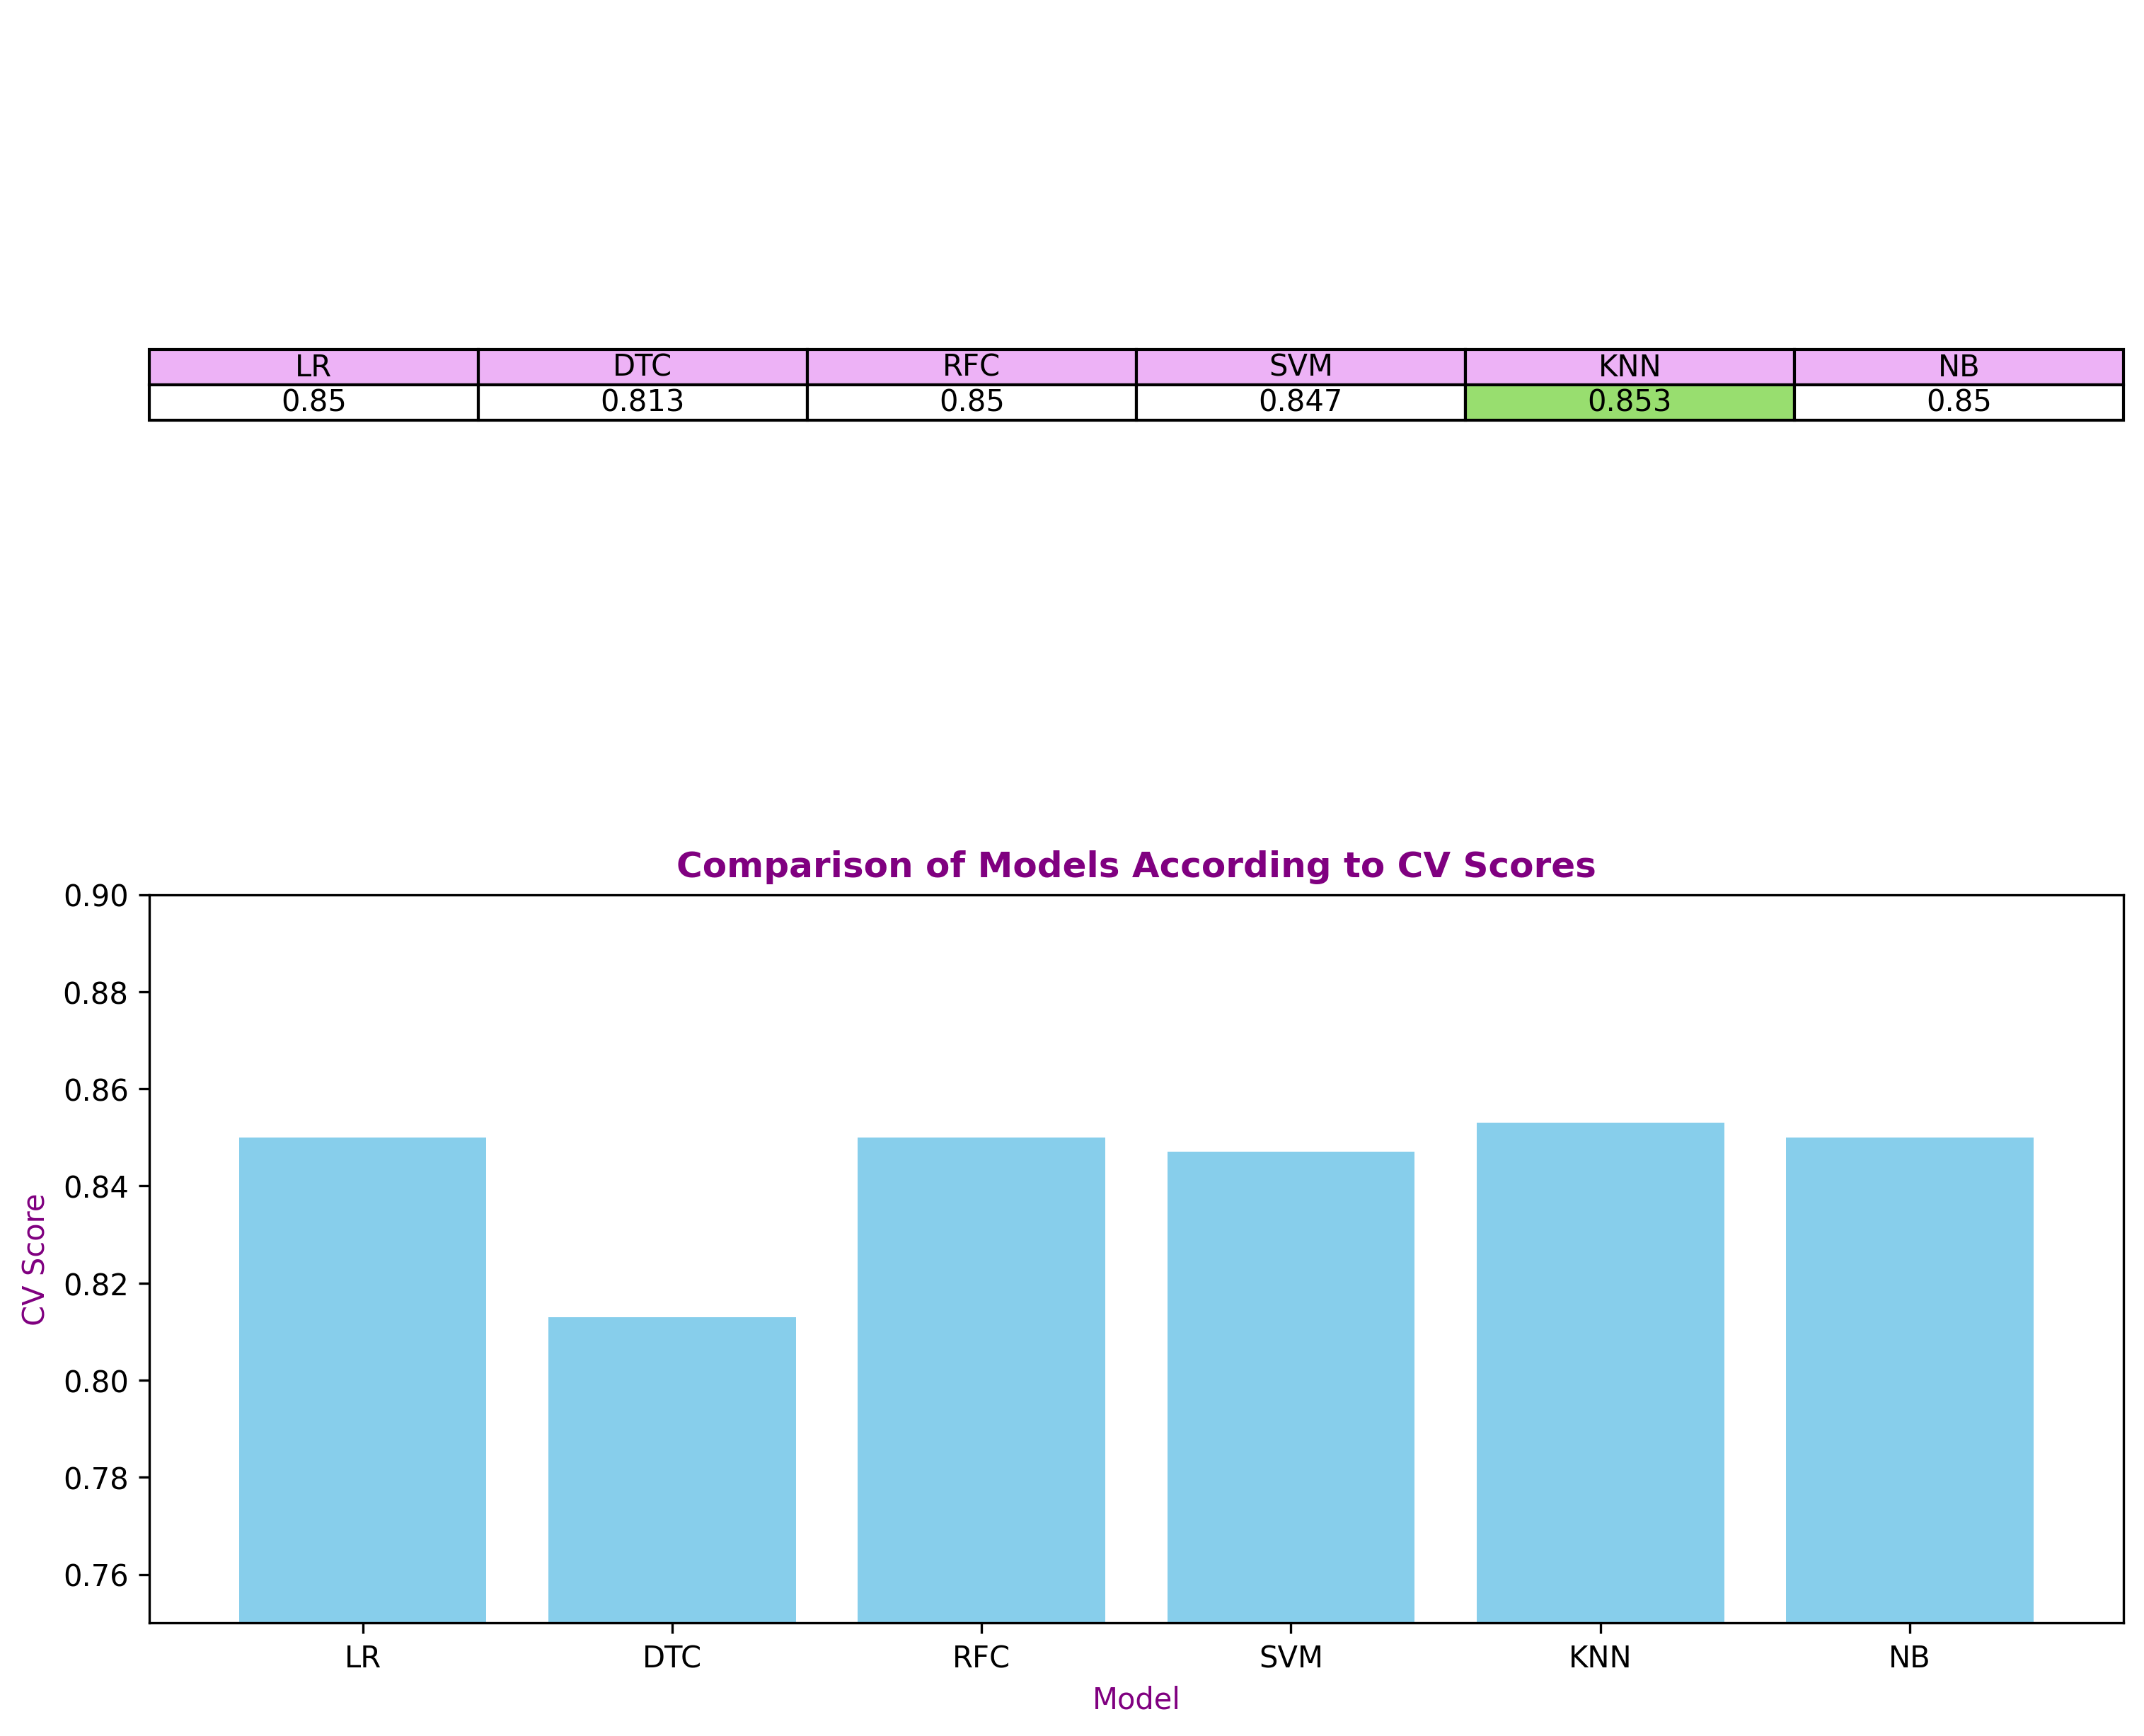

In [36]:
model.cross_validations()